 # What does data say about work life balance and achieviement?
Questions:
•	Do the variables in the dataset explain the work life balance score? 
• Which demographic, amongst three different groups, have the better or worse work-life balance according to this data? 
• Which demographic, amongst three different groups, have the better or worse achievement according to this data? 
• What are the strongest correlations between the various variables? 
• What drives our work life balance?
• What drives our achievement?


Value: 
use these variables to reinvent work life balance and increase our achievements. 


## Loading Python packages and data 

In [1]:
# Several helpful Python packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

Resources:

Link for the Kaggle dataset: https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data
Link for the survey:http://www.authentic-happiness.com/your-life-satisfaction-score

You can download this dataset from Kaggle. Please, see code below.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data.csv

Afer downloading the csv file as Excel file, I did some preliminary data preparation in Excel, including change data type for a few variables and lower cases for all column headings.

In [2]:
#Load dataset
#Link for the dataset in kaggle: https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data
#Link for the survey:http://www.authentic-happiness.com/your-life-satisfaction-score

data = pd.read_excel('Wellbeing_lifestyle_Kaggle_v1.xlsx') # file posted on GitHub
print(data.shape)
data.head()
#(15972, 24)
#24 columns
# 15972 observations

(15972, 24)


timestamp  fruits_veggies  daily_stress  places_visited  \
0  Tuesday, July 7, 2015               3             2               2   
1  Tuesday, July 7, 2015               2             3               4   
2  Tuesday, July 7, 2015               2             3               3   
3  Tuesday, July 7, 2015               3             3              10   
4  Tuesday, July 7, 2015               5             1               3   

   core_circle  supporting_others  social_network  achievement  donation  \
0            5                  0               5            2         0   
1            3                  8              10            5         2   
2            4                  4              10            3         2   
3            3                 10               7            2         5   
4            3                 10               4            2         4   

   bmi_range  ...  sleep_hours  lost_vacation  daily_shouting  \
0          1  ...            7              5               5   
1          2  ...            8              2               2   
2          2  ...            8             10               2   
3          2  ...            5              7               5   
4          2  ...            7              0               0   

   sufficient_income  personal_awards  time_for_passion  weekly_meditation  \
0                  1                4                 0                  5   
1                  2                3                 2                  6   
2                  2                4                 8                  3   
3                  1                5                 2                  0   
4                  2                8                 1                  5   

          age  gender  work_life_balance_score  
0    36 to 50  Female                    609.5  
1    36 to 50  Female                    655.6  
2    36 to 50  Female                    631.6  
3  51 or more  Female                    622.7  
4  51 or more  Female                    663.9  

[5 rows x 24 columns]

## Initial EDA

In [3]:
#Displaying column names of the dataset and first few rows of the data:
print(list(data.columns))

['timestamp', 'fruits_veggies', 'daily_stress', 'places_visited', 'core_circle', 'supporting_others', 'social_network', 'achievement', 'donation', 'bmi_range', 'todo_completed', 'flow', 'daily_steps', 'live_vision', 'sleep_hours', 'lost_vacation', 'daily_shouting', 'sufficient_income', 'personal_awards', 'time_for_passion', 'weekly_meditation', 'age', 'gender', 'work_life_balance_score']


Displaying column names of the dataset and first few rows of the data:

In [4]:
#Displaying first few rows of the data:
data.head()

timestamp  fruits_veggies  daily_stress  places_visited  \
0  Tuesday, July 7, 2015               3             2               2   
1  Tuesday, July 7, 2015               2             3               4   
2  Tuesday, July 7, 2015               2             3               3   
3  Tuesday, July 7, 2015               3             3              10   
4  Tuesday, July 7, 2015               5             1               3   

   core_circle  supporting_others  social_network  achievement  donation  \
0            5                  0               5            2         0   
1            3                  8              10            5         2   
2            4                  4              10            3         2   
3            3                 10               7            2         5   
4            3                 10               4            2         4   

   bmi_range  ...  sleep_hours  lost_vacation  daily_shouting  \
0          1  ...            7              5               5   
1          2  ...            8              2               2   
2          2  ...            8             10               2   
3          2  ...            5              7               5   
4          2  ...            7              0               0   

   sufficient_income  personal_awards  time_for_passion  weekly_meditation  \
0                  1                4                 0                  5   
1                  2                3                 2                  6   
2                  2                4                 8                  3   
3                  1                5                 2                  0   
4                  2                8                 1                  5   

          age  gender  work_life_balance_score  
0    36 to 50  Female                    609.5  
1    36 to 50  Female                    655.6  
2    36 to 50  Female                    631.6  
3  51 or more  Female                    622.7  
4  51 or more  Female                    663.9  

[5 rows x 24 columns]

In [5]:
#Learning dataset - isnull, type of variables

print(data.isnull().sum())
data.info()

timestamp                  0
fruits_veggies             0
daily_stress               0
places_visited             0
core_circle                0
supporting_others          0
social_network             0
achievement                0
donation                   0
bmi_range                  0
todo_completed             0
flow                       0
daily_steps                0
live_vision                0
sleep_hours                0
lost_vacation              0
daily_shouting             0
sufficient_income          0
personal_awards            0
time_for_passion           0
weekly_meditation          0
age                        0
gender                     0
work_life_balance_score    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                15972 non-null  object 
 1   fruits_veggies 

In [6]:
#Basic numerical EDA:
data.describe()

fruits_veggies  daily_stress  places_visited   core_circle  \
count    15972.000000  15972.000000    15972.000000  15972.000000   
mean         2.922677      2.791698        5.232970      5.508077   
std          1.442694      1.367759        3.311912      2.840334   
min          0.000000      0.000000        0.000000      0.000000   
25%          2.000000      2.000000        2.000000      3.000000   
50%          3.000000      3.000000        5.000000      5.000000   
75%          4.000000      4.000000        8.000000      8.000000   
max          5.000000      5.000000       10.000000     10.000000   

       supporting_others  social_network   achievement      donation  \
count       15972.000000    15972.000000  15972.000000  15972.000000   
mean            5.616454        6.474267      4.000751      2.715314   
std             3.242021        3.086672      2.755837      1.851586   
min             0.000000        0.000000      0.000000      0.000000   
25%             3.000000        4.000000      2.000000      1.000000   
50%             5.000000        6.000000      3.000000      3.000000   
75%            10.000000       10.000000      6.000000      5.000000   
max            10.000000       10.000000     10.000000      5.000000   

          bmi_range  todo_completed  ...   daily_steps   live_vision  \
count  15972.000000    15972.000000  ...  15972.000000  15972.000000   
mean       1.410656        5.745993  ...      5.703606      3.752129   
std        0.491968        2.624097  ...      2.891013      3.230987   
min        1.000000        0.000000  ...      1.000000      0.000000   
25%        1.000000        4.000000  ...      3.000000      1.000000   
50%        1.000000        6.000000  ...      5.000000      3.000000   
75%        2.000000        8.000000  ...      8.000000      5.000000   
max        2.000000       10.000000  ...     10.000000     10.000000   

        sleep_hours  lost_vacation  daily_shouting  sufficient_income  \
count  15972.000000   15972.000000    15972.000000       15972.000000   
mean       7.042888       2.898886        2.930879           1.728963   
std        1.199044       3.692180        2.676301           0.444509   
min        1.000000       0.000000        0.000000           1.000000   
25%        6.000000       0.000000        1.000000           1.000000   
50%        7.000000       0.000000        2.000000           2.000000   
75%        8.000000       5.000000        4.000000           2.000000   
max       10.000000      10.000000       10.000000           2.000000   

       personal_awards  time_for_passion  weekly_meditation  \
count     15972.000000      15972.000000       15972.000000   
mean          5.711558          3.326572           6.233346   
std           3.089630          2.729293           3.016571   
min           0.000000          0.000000           0.000000   
25%           3.000000          1.000000           4.000000   
50%           5.000000          3.000000           7.000000   
75%           9.000000          5.000000          10.000000   
max          10.000000         10.000000          10.000000   

       work_life_balance_score  
count             15972.000000  
mean                666.751503  
std                  45.019868  
min                 480.000000  
25%                 636.000000  
50%                 667.700000  
75%                 698.500000  
max                 820.200000  

[8 rows x 21 columns]

In [7]:
#Correlation for all numerical data columns of interest:
#data.corr()

In [8]:
data['gender'].describe()

count      15972
unique         2
top       Female
freq        9858
Name: gender, dtype: object

In [9]:
# create dummy variable for WLB score
def dummy(x):
    if x < 550:
        return "1"
    elif x >= 550 and x < 680:
        return "2"
    else:
        return '3'

data['wlb_dummy'] = data['work_life_balance_score'].apply(dummy)

data.head()

timestamp  fruits_veggies  daily_stress  places_visited  \
0  Tuesday, July 7, 2015               3             2               2   
1  Tuesday, July 7, 2015               2             3               4   
2  Tuesday, July 7, 2015               2             3               3   
3  Tuesday, July 7, 2015               3             3              10   
4  Tuesday, July 7, 2015               5             1               3   

   core_circle  supporting_others  social_network  achievement  donation  \
0            5                  0               5            2         0   
1            3                  8              10            5         2   
2            4                  4              10            3         2   
3            3                 10               7            2         5   
4            3                 10               4            2         4   

   bmi_range  ...  lost_vacation  daily_shouting  sufficient_income  \
0          1  ...              5               5                  1   
1          2  ...              2               2                  2   
2          2  ...             10               2                  2   
3          2  ...              7               5                  1   
4          2  ...              0               0                  2   

   personal_awards  time_for_passion  weekly_meditation         age  gender  \
0                4                 0                  5    36 to 50  Female   
1                3                 2                  6    36 to 50  Female   
2                4                 8                  3    36 to 50  Female   
3                5                 2                  0  51 or more  Female   
4                8                 1                  5  51 or more  Female   

   work_life_balance_score  wlb_dummy  
0                    609.5          2  
1                    655.6          2  
2                    631.6          2  
3                    622.7          2  
4                    663.9          2  

[5 rows x 25 columns]

In [10]:
data['wlb_dummy'].value_counts(normalize=True)

2    0.601114
3    0.394252
1    0.004633
Name: wlb_dummy, dtype: float64

In [11]:
#Create new variables - year, month, day of week
data['year'] = pd.DatetimeIndex(data['timestamp']).year
data['month'] = pd.DatetimeIndex(data['timestamp']).month

data['timestamp'] = pd.to_datetime(data['timestamp'])
data['day_of_week'] =data['timestamp'].dt.day_name()

data.head()


timestamp  fruits_veggies  daily_stress  places_visited  core_circle  \
0 2015-07-07               3             2               2            5   
1 2015-07-07               2             3               4            3   
2 2015-07-07               2             3               3            4   
3 2015-07-07               3             3              10            3   
4 2015-07-07               5             1               3            3   

   supporting_others  social_network  achievement  donation  bmi_range  ...  \
0                  0               5            2         0          1  ...   
1                  8              10            5         2          2  ...   
2                  4              10            3         2          2  ...   
3                 10               7            2         5          2  ...   
4                 10               4            2         4          2  ...   

   personal_awards  time_for_passion  weekly_meditation         age  gender  \
0                4                 0                  5    36 to 50  Female   
1                3                 2                  6    36 to 50  Female   
2                4                 8                  3    36 to 50  Female   
3                5                 2                  0  51 or more  Female   
4                8                 1                  5  51 or more  Female   

   work_life_balance_score  wlb_dummy  year  month  day_of_week  
0                    609.5          2  2015      7      Tuesday  
1                    655.6          2  2015      7      Tuesday  
2                    631.6          2  2015      7      Tuesday  
3                    622.7          2  2015      7      Tuesday  
4                    663.9          2  2015      7      Tuesday  

[5 rows x 28 columns]

In [12]:
#Preprocessing - dummy variables for gender, age, day of week.
data['gender'] = data['gender'].map({'Female':1, 'Male':0})
data['daily_stress'] = data['daily_stress'].astype(int)
data['age'] = data['age'].map({'Less than 20':1, '21 to 35':2, '36 to 50':3, '51 or more':4})
data['day_of_week'] = data['day_of_week'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7,})
data = data.drop(columns =['timestamp'])
data.head()
# After preprocessing  our data we have four more columns - 'wlb dummy', 'day of week', 'month' and 'year'. 
#Removed a column 'timestamp'
#Total of 27 columns.

fruits_veggies  daily_stress  places_visited  core_circle  \
0               3             2               2            5   
1               2             3               4            3   
2               2             3               3            4   
3               3             3              10            3   
4               5             1               3            3   

   supporting_others  social_network  achievement  donation  bmi_range  \
0                  0               5            2         0          1   
1                  8              10            5         2          2   
2                  4              10            3         2          2   
3                 10               7            2         5          2   
4                 10               4            2         4          2   

   todo_completed  ...  personal_awards  time_for_passion  weekly_meditation  \
0               6  ...                4                 0                  5   
1               5  ...                3                 2                  6   
2               2  ...                4                 8                  3   
3               3  ...                5                 2                  0   
4               5  ...                8                 1                  5   

   age  gender  work_life_balance_score  wlb_dummy  year  month  day_of_week  
0    3       1                    609.5          2  2015      7            2  
1    3       1                    655.6          2  2015      7            2  
2    3       1                    631.6          2  2015      7            2  
3    4       1                    622.7          2  2015      7            2  
4    4       1                    663.9          2  2015      7            2  

[5 rows x 27 columns]

In [13]:
#data.describe()
data.columns

Index(['fruits_veggies', 'daily_stress', 'places_visited', 'core_circle',
       'supporting_others', 'social_network', 'achievement', 'donation',
       'bmi_range', 'todo_completed', 'flow', 'daily_steps', 'live_vision',
       'sleep_hours', 'lost_vacation', 'daily_shouting', 'sufficient_income',
       'personal_awards', 'time_for_passion', 'weekly_meditation', 'age',
       'gender', 'work_life_balance_score', 'wlb_dummy', 'year', 'month',
       'day_of_week'],
      dtype='object')

# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001928CA21948>,
      dtype=object)

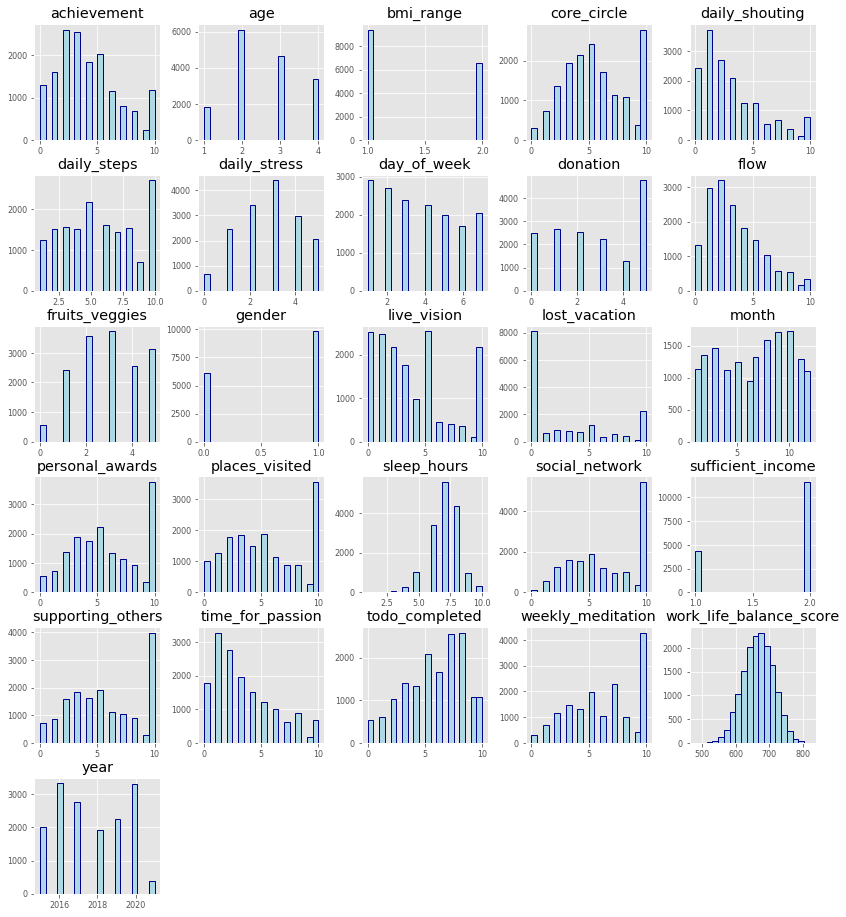

In [14]:
#generate a histogram for all int/float variables in our dataframe
data.hist(figsize=(14,16), bins = 20, xlabelsize=8, ylabelsize = 8, color = "lightblue", ec="darkblue", lw=1)

Text(0, 0.5, 'density \n')

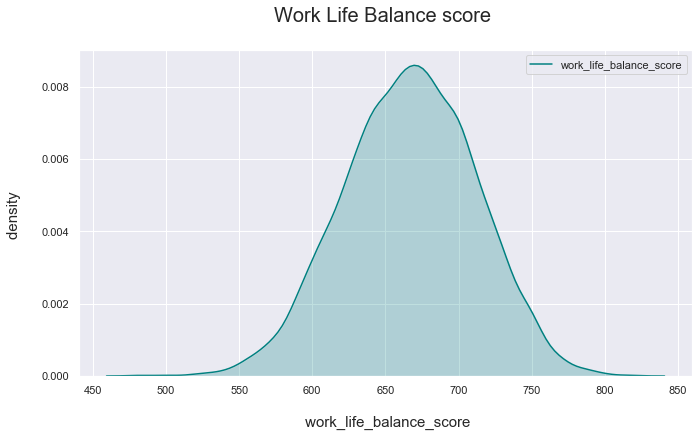

In [16]:
# density plot for "work_life_balance_score"
sns.set(rc={"figure.figsize":(11, 6)})
sns.kdeplot(data["work_life_balance_score"], shade = True, color = "teal").set_title("Work Life Balance score \n",fontsize = 20)
plt.xlabel("\n work_life_balance_score", fontsize = 15)
plt.ylabel("density \n", fontsize = 15)

Text(0, 0.5, 'density \n')

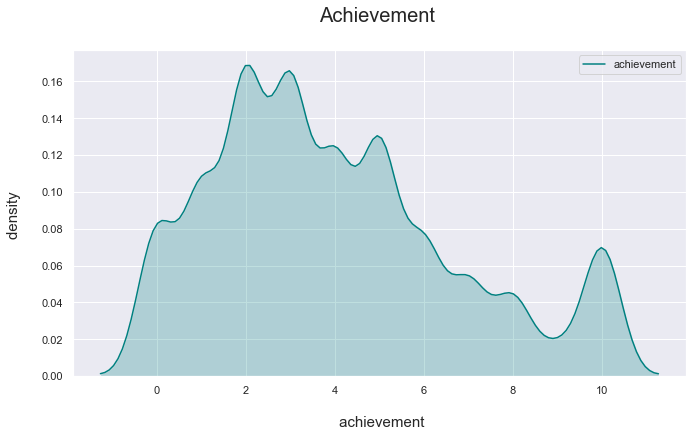

In [17]:
#density plot for 'achievement'
sns.set(rc={"figure.figsize":(11, 6)})
sns.kdeplot(data["achievement"], shade = True, color="Teal").set_title("Achievement \n",fontsize = 20)
plt.xlabel("\n achievement", fontsize = 15)
plt.ylabel("density \n", fontsize = 15)

Text(0, 0.5, 'density \n')

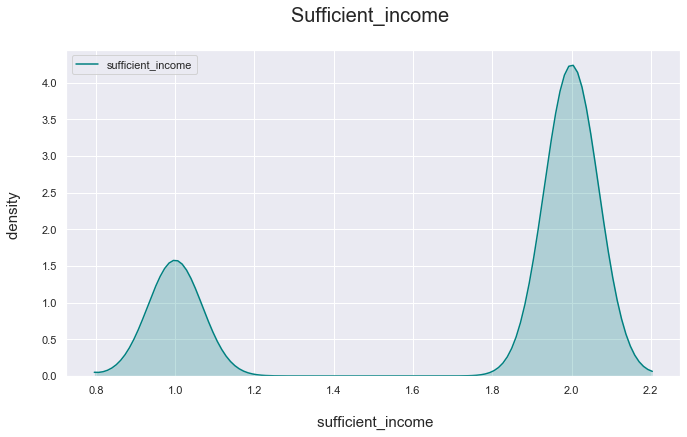

In [18]:
# density plot for sufficient_income
sns.set(rc={"figure.figsize":(11, 6)})
sns.kdeplot(data["sufficient_income"], shade = True, color="teal").set_title("Sufficient_income \n",fontsize = 20)
plt.xlabel("\n sufficient_income", fontsize = 15)
plt.ylabel("density \n", fontsize = 15)


In [19]:
data['wlb_dummy'].value_counts()

2    9601
3    6297
1      74
Name: wlb_dummy, dtype: int64

In [20]:
data['gender'].value_counts()

1    9858
0    6114
Name: gender, dtype: int64

In [21]:
data['sufficient_income'].value_counts()

2    11643
1     4329
Name: sufficient_income, dtype: int64

In [22]:
data['places_visited'].value_counts()

10    3558
5     1862
3     1840
2     1787
4     1503
1     1253
6     1136
0     1016
8      881
7      878
9      258
Name: places_visited, dtype: int64

In [23]:
data['bmi_range'].value_counts()

1    9413
2    6559
Name: bmi_range, dtype: int64

In [24]:
data['weekly_meditation'].value_counts()

10    4285
7     2275
5     1977
3     1487
4     1310
2     1163
6     1043
8      993
1      701
9      441
0      297
Name: weekly_meditation, dtype: int64

In [25]:
data.describe()

fruits_veggies  daily_stress  places_visited   core_circle  \
count    15972.000000  15972.000000    15972.000000  15972.000000   
mean         2.922677      2.791698        5.232970      5.508077   
std          1.442694      1.367759        3.311912      2.840334   
min          0.000000      0.000000        0.000000      0.000000   
25%          2.000000      2.000000        2.000000      3.000000   
50%          3.000000      3.000000        5.000000      5.000000   
75%          4.000000      4.000000        8.000000      8.000000   
max          5.000000      5.000000       10.000000     10.000000   

       supporting_others  social_network   achievement      donation  \
count       15972.000000    15972.000000  15972.000000  15972.000000   
mean            5.616454        6.474267      4.000751      2.715314   
std             3.242021        3.086672      2.755837      1.851586   
min             0.000000        0.000000      0.000000      0.000000   
25%             3.000000        4.000000      2.000000      1.000000   
50%             5.000000        6.000000      3.000000      3.000000   
75%            10.000000       10.000000      6.000000      5.000000   
max            10.000000       10.000000     10.000000      5.000000   

          bmi_range  todo_completed  ...  sufficient_income  personal_awards  \
count  15972.000000    15972.000000  ...       15972.000000     15972.000000   
mean       1.410656        5.745993  ...           1.728963         5.711558   
std        0.491968        2.624097  ...           0.444509         3.089630   
min        1.000000        0.000000  ...           1.000000         0.000000   
25%        1.000000        4.000000  ...           1.000000         3.000000   
50%        1.000000        6.000000  ...           2.000000         5.000000   
75%        2.000000        8.000000  ...           2.000000         9.000000   
max        2.000000       10.000000  ...           2.000000        10.000000   

       time_for_passion  weekly_meditation           age        gender  \
count      15972.000000       15972.000000  15972.000000  15972.000000   
mean           3.326572           6.233346      2.602054      0.617205   
std            2.729293           3.016571      0.944408      0.486084   
min            0.000000           0.000000      1.000000      0.000000   
25%            1.000000           4.000000      2.000000      0.000000   
50%            3.000000           7.000000      3.000000      1.000000   
75%            5.000000          10.000000      3.000000      1.000000   
max           10.000000          10.000000      4.000000      1.000000   

       work_life_balance_score          year         month   day_of_week  
count             15972.000000  15972.000000  15972.000000  15972.000000  
mean                666.751503   2017.656148      6.659154      3.691460  
std                  45.019868      1.789001      3.395777      2.017634  
min                 480.000000   2015.000000      1.000000      1.000000  
25%                 636.000000   2016.000000      4.000000      2.000000  
50%                 667.700000   2017.000000      7.000000      4.000000  
75%                 698.500000   2019.000000     10.000000      5.000000  
max                 820.200000   2021.000000     12.000000      7.000000  

[8 rows x 26 columns]

In [26]:
# # Labels
# import matplotlib.pyplot as plot
# data['year'].value_counts().plot.bar()

In [27]:
# import matplotlib.pyplot as plot
# data['month'].value_counts().plot.bar()

In [28]:
#import matplotlib.pyplot as plot
#data['day_of_week'].value_counts().plot.bar()

# What are the strongest correlations between the various variables?

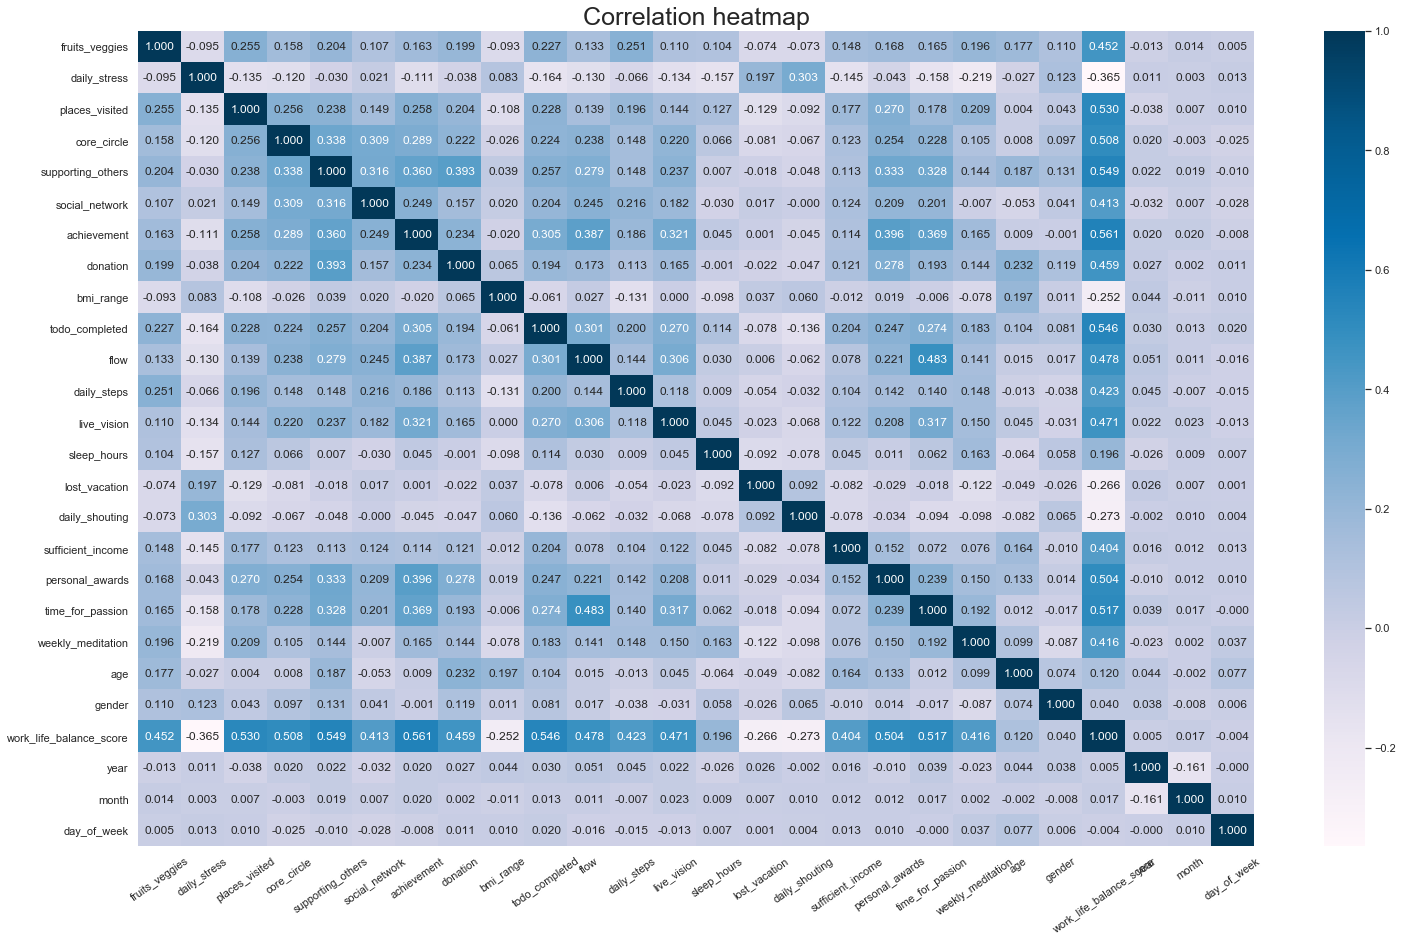

In [29]:
#Correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(data=data.corr(), annot=True, fmt='0.3f', cmap='PuBu');
plt.title('Correlation heatmap', fontsize =25)
plt.xticks(rotation=35);

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fruits_veggies           15972 non-null  int64  
 1   daily_stress             15972 non-null  int32  
 2   places_visited           15972 non-null  int64  
 3   core_circle              15972 non-null  int64  
 4   supporting_others        15972 non-null  int64  
 5   social_network           15972 non-null  int64  
 6   achievement              15972 non-null  int64  
 7   donation                 15972 non-null  int64  
 8   bmi_range                15972 non-null  int64  
 9   todo_completed           15972 non-null  int64  
 10  flow                     15972 non-null  int64  
 11  daily_steps              15972 non-null  int64  
 12  live_vision              15972 non-null  int64  
 13  sleep_hours              15972 non-null  int64  
 14  lost_vacation         

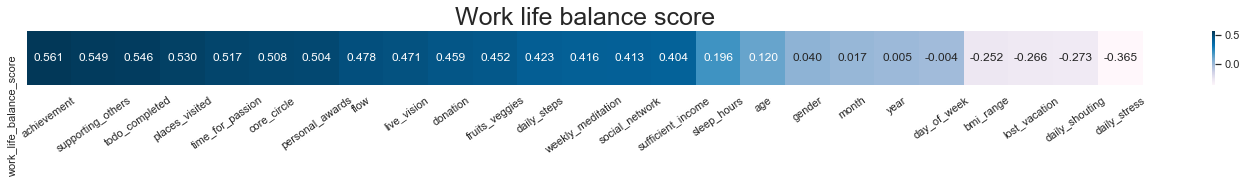

In [31]:
#Correlation WLB
WLB_corr = data.corr().iloc[22]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: WLB_corr[WLB_corr.index==cname].iloc[0] for cname in WLB_corr.index}, index=['work_life_balance_score']);
df_piv.sort_values(axis=1, by='work_life_balance_score', inplace=True, ascending=False)
df_piv.drop(['work_life_balance_score'], axis=1, inplace=True)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Work life balance score', size=25);

In [32]:
#Interesting to see that daily shouting does not support others. Not surprises there. 
# Lost vacation and daily stress do not help to support othres either.

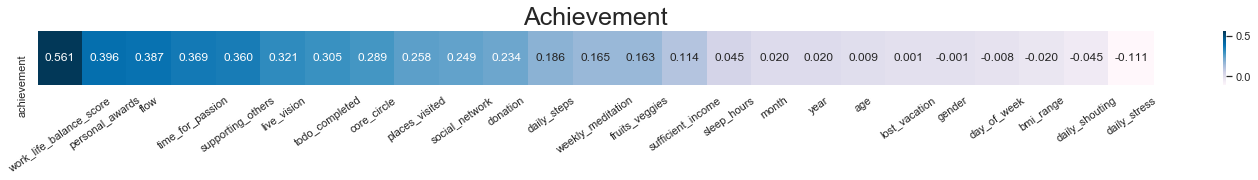

In [33]:
# Correlation 'achievement'
so_corr = data.corr().iloc[6]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['achievement']);
df_piv.sort_values(axis=1, by='achievement', inplace=True, ascending=False)
df_piv.drop('achievement', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Achievement', size=25);

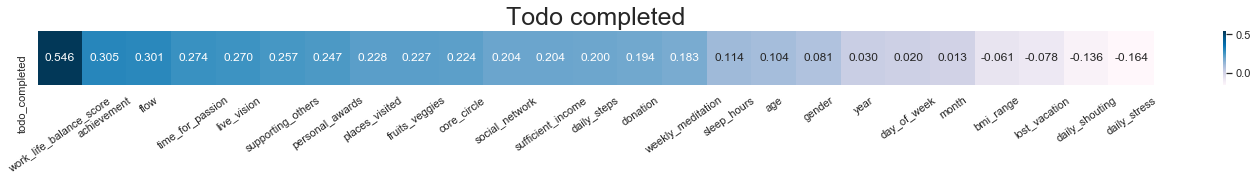

In [34]:
# Correlation 'todo_completed'
so_corr = data.corr().iloc[9]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['todo_completed']);
df_piv.sort_values(axis=1, by='todo_completed', inplace=True, ascending=False)
df_piv.drop('todo_completed', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Todo completed', size=25);# Correlation 'todo_completed'

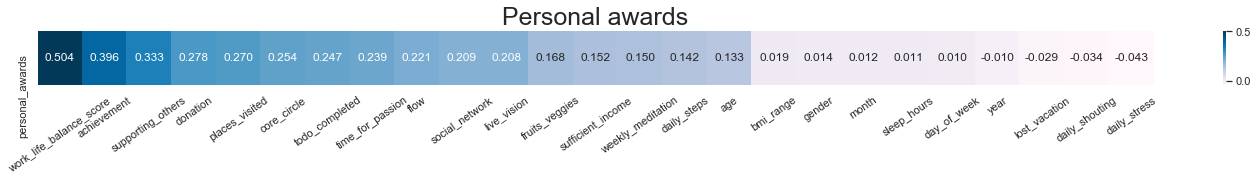

In [35]:
# Correlation 'personal_awards'
so_corr = data.corr().iloc[17]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['personal_awards']);
df_piv.sort_values(axis=1, by='personal_awards', inplace=True, ascending=False)
df_piv.drop('personal_awards', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Personal awards', size=25);# Correlation 'personal awards'

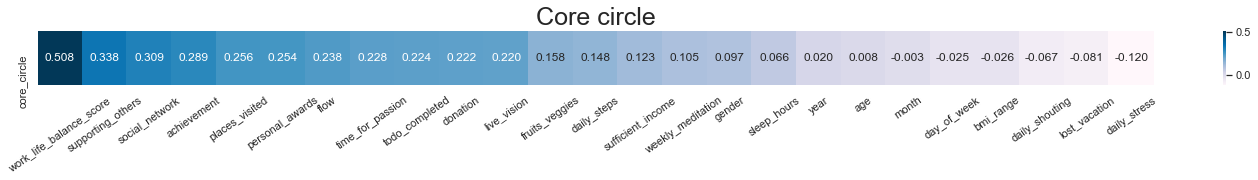

In [36]:
# Correlation 'core_circle'
so_corr = data.corr().iloc[3]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['core_circle']);
df_piv.sort_values(axis=1, by='core_circle', inplace=True, ascending=False)
df_piv.drop('core_circle', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Core circle', size=25);# Correlation 'core_circle'

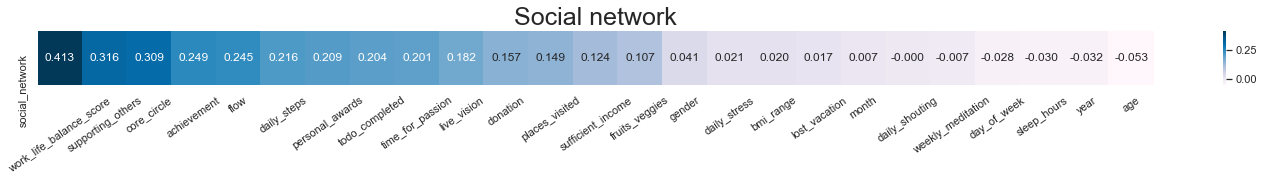

In [37]:
# Correlation 'social_network'
so_corr = data.corr().iloc[5]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['social_network']);
df_piv.sort_values(axis=1, by='social_network', inplace=True, ascending=False)
df_piv.drop('social_network', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Social network', size=25);# Correlation 'social_network'

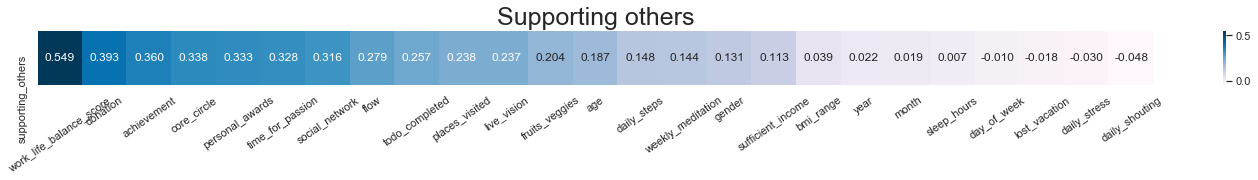

In [38]:
# Correlation 'Supporting Others'
so_corr = data.corr().iloc[4]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['supporting_others']);
df_piv.sort_values(axis=1, by='supporting_others', inplace=True, ascending=False)
df_piv.drop('supporting_others', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Supporting others', size=25);

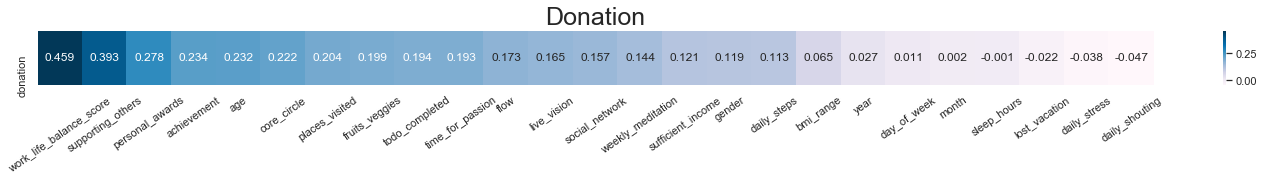

In [39]:
# Correlation 'donation'
so_corr = data.corr().iloc[7]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['donation']);
df_piv.sort_values(axis=1, by='donation', inplace=True, ascending=False)
df_piv.drop('donation', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Donation', size=25);# Correlation 'donation'

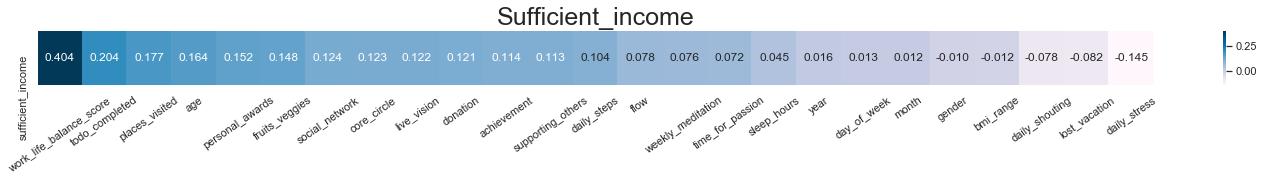

In [40]:
# Correlation 'sufficient_income'
so_corr = data.corr().iloc[16]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['sufficient_income']);
df_piv.sort_values(axis=1, by='sufficient_income', inplace=True, ascending=False)
df_piv.drop('sufficient_income', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Sufficient_income', size=25);# Correlation 'sufficient_income'

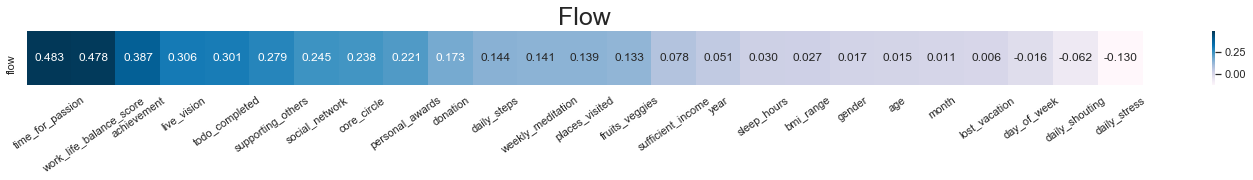

In [41]:
# Correlation 'flow'
so_corr = data.corr().iloc[10]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['flow']);
df_piv.sort_values(axis=1, by='flow', inplace=True, ascending=False)
df_piv.drop('flow', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Flow', size=25);# Correlation 'flow'

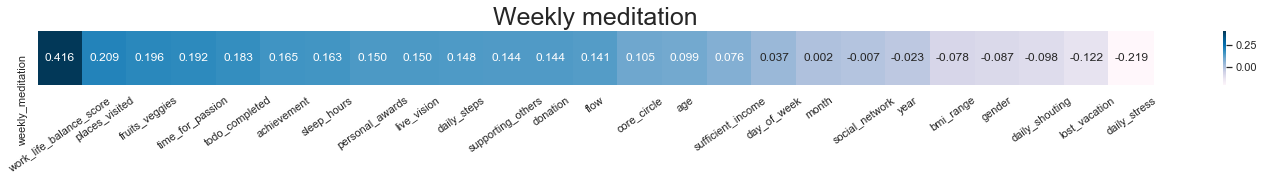

In [42]:
# Correlation 'weekly_meditation'
so_corr = data.corr().iloc[19]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['weekly_meditation']);
df_piv.sort_values(axis=1, by='weekly_meditation', inplace=True, ascending=False)
df_piv.drop('weekly_meditation', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Weekly meditation', size=25);# Correlation 'weekly_meditation'

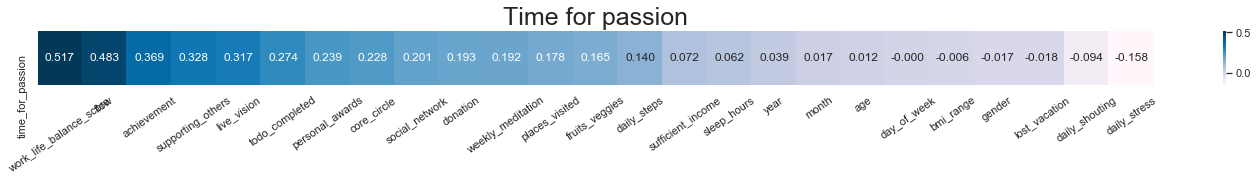

In [43]:
# Correlation 'time_for_passion'
so_corr = data.corr().iloc[18]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['time_for_passion']);
df_piv.sort_values(axis=1, by='time_for_passion', inplace=True, ascending=False)
df_piv.drop('time_for_passion', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Time for passion', size=25);# Correlation 'time_for_passion'

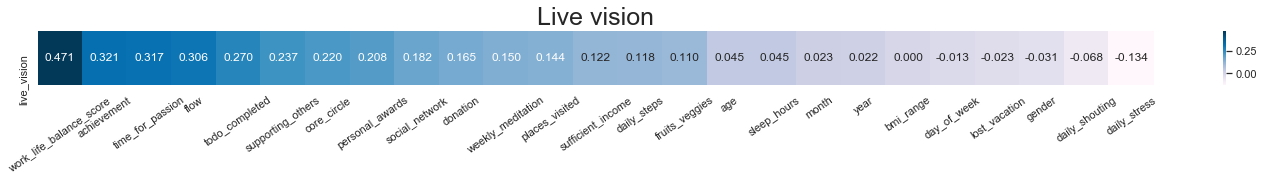

In [44]:
# Correlation 'live_vision'
so_corr = data.corr().iloc[12]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['live_vision']);
df_piv.sort_values(axis=1, by='live_vision', inplace=True, ascending=False)
df_piv.drop('live_vision', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Live vision', size=25);# Correlation 'live_vision'

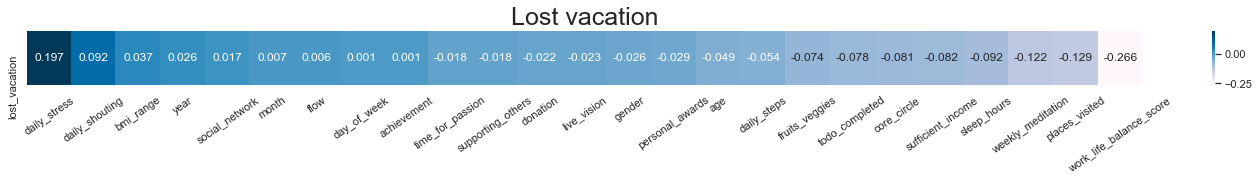

In [45]:
# Correlation 'lost_vacation'
so_corr = data.corr().iloc[14]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['lost_vacation']);
df_piv.sort_values(axis=1, by='lost_vacation', inplace=True, ascending=False)
df_piv.drop('lost_vacation', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Lost vacation', size=25);# Correlation 'lost_vacation'

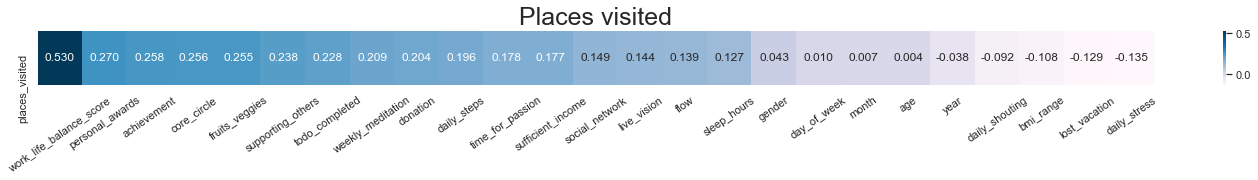

In [46]:
# Correlation 'places_visited'
so_corr = data.corr().iloc[2]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['places_visited']);
df_piv.sort_values(axis=1, by='places_visited', inplace=True, ascending=False)
df_piv.drop('places_visited', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Places visited', size=25);# Correlation 'places_visited'

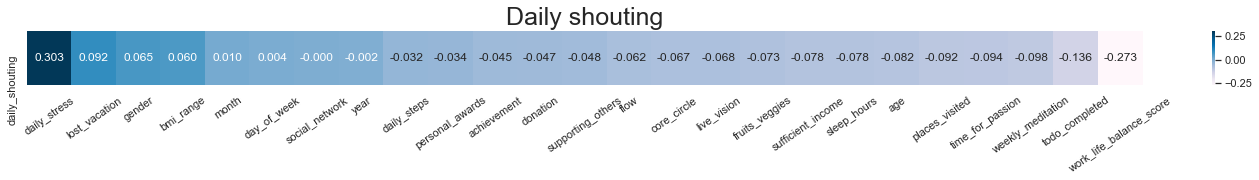

In [47]:
# Correlation 'daily_shouting'
so_corr = data.corr().iloc[15]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['daily_shouting']);
df_piv.sort_values(axis=1, by='daily_shouting', inplace=True, ascending=False)
df_piv.drop('daily_shouting', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Daily shouting', size=25);# Correlation 'daily_shouting'

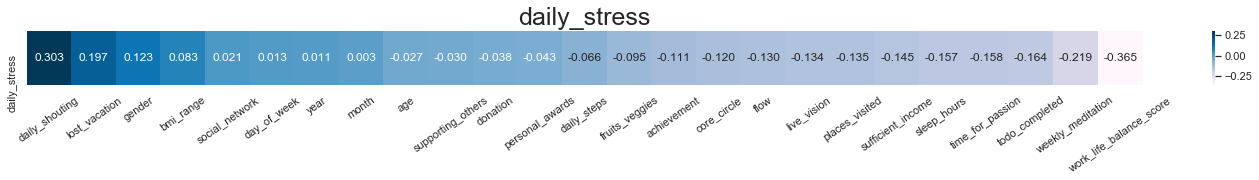

In [48]:
# Correlation 'daily_stress'
so_corr = data.corr().iloc[1]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['daily_stress']);
df_piv.sort_values(axis=1, by='daily_stress', inplace=True, ascending=False)
df_piv.drop('daily_stress', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('daily_stress', size=25);# Correlation 'daily_stress'

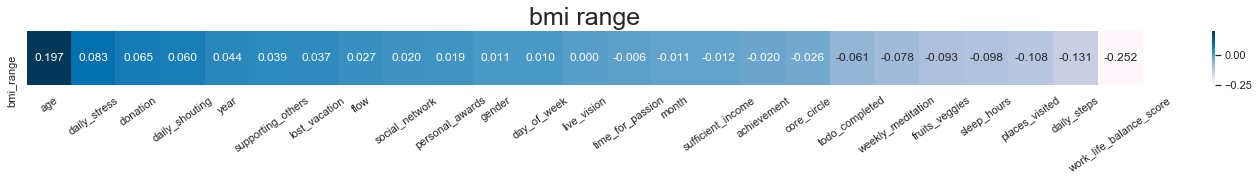

In [49]:
# Correlation 'bmi_range'
so_corr = data.corr().iloc[8]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['bmi_range']);
df_piv.sort_values(axis=1, by='bmi_range', inplace=True, ascending=False)
df_piv.drop('bmi_range', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('bmi range', size=25);# Correlation 'bmi_range'

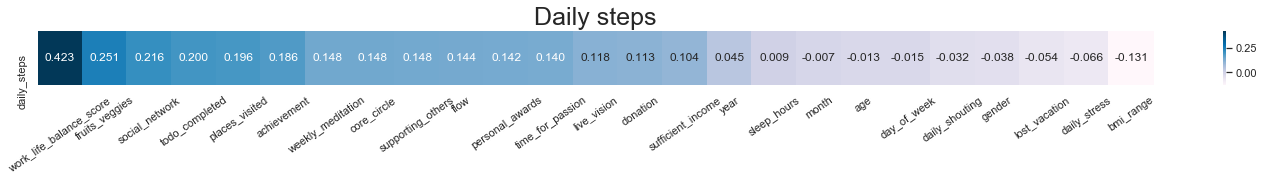

In [50]:
# Correlation 'daily_steps'
so_corr = data.corr().iloc[11]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['daily_steps']);
df_piv.sort_values(axis=1, by='daily_steps', inplace=True, ascending=False)
df_piv.drop('daily_steps', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('Daily steps', size=25);# Correlation 'daily_steps'

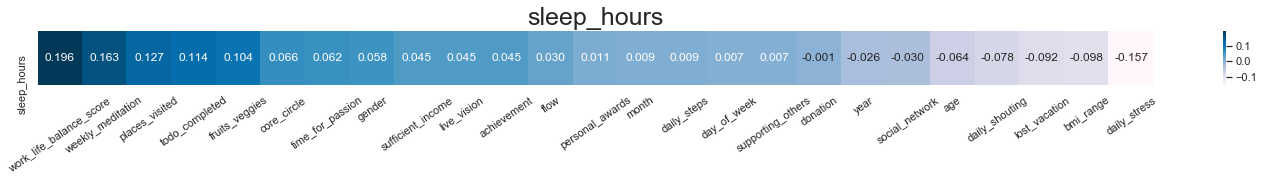

In [51]:
# Correlation 'sleep_hours'
so_corr = data.corr().iloc[13]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['sleep_hours']);
df_piv.sort_values(axis=1, by='sleep_hours', inplace=True, ascending=False)
df_piv.drop('sleep_hours', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('sleep_hours', size=25);# Correlation 'sleep_hours'

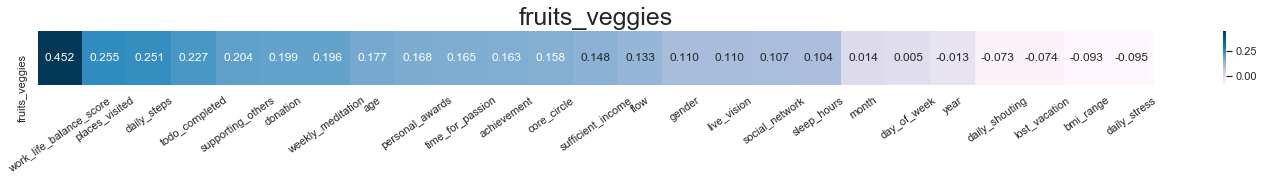

In [52]:
# Correlation 'fruits_veggies'
so_corr = data.corr().iloc[0]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['fruits_veggies']);
df_piv.sort_values(axis=1, by='fruits_veggies', inplace=True, ascending=False)
df_piv.drop('fruits_veggies', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('fruits_veggies', size=25);# Correlation 'fruits_veggies'

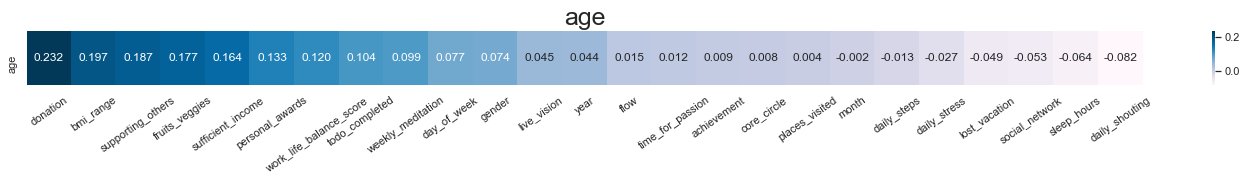

In [53]:
# Correlation 'age'
so_corr = data.corr().iloc[20]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['age']);
df_piv.sort_values(axis=1, by='age', inplace=True, ascending=False)
df_piv.drop('age', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('age', size=25);# Correlation 'age'

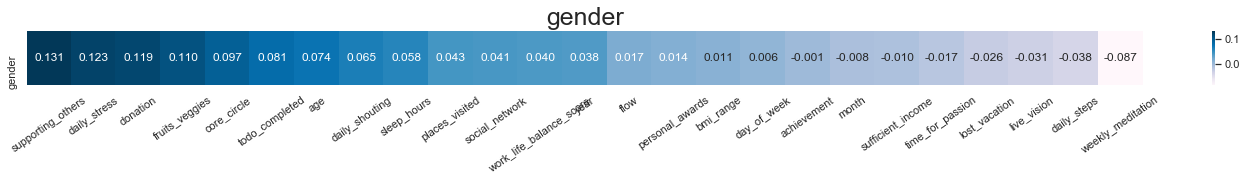

In [54]:
# Correlation 'gender'
so_corr = data.corr().iloc[21]
plt.figure(figsize=(25,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['gender']);
df_piv.sort_values(axis=1, by='gender', inplace=True, ascending=False)
df_piv.drop('gender', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=35);
plt.title('gender', size=25);# Correlation 'gender'

# Which demographic, amongst three different groups, have the better or worse work-life balance according to this data? 

In [55]:
#Functions for evaluation of WLB and achievement
def plot_f(data,param,x_lab,y_lab):
    '''this function builds plot for the data frame'''
    sns.set(style="ticks")
    fig=data.set_index(param).T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("PuBu", 10)),figsize=(10,10))
    plt.grid()
    fig.set_ylabel(y_lab, fontsize=15)
    fig.set_xlabel(x_lab, fontsize=15)
    fig.tick_params(rotation= 45,labelsize=15)
    

def percentage_f(data_p):
    '''this function converts all variables to their percentage per column'''
    summ=data_p.sum(axis=0)
    data_p=data_p*100/summ
    return data_p

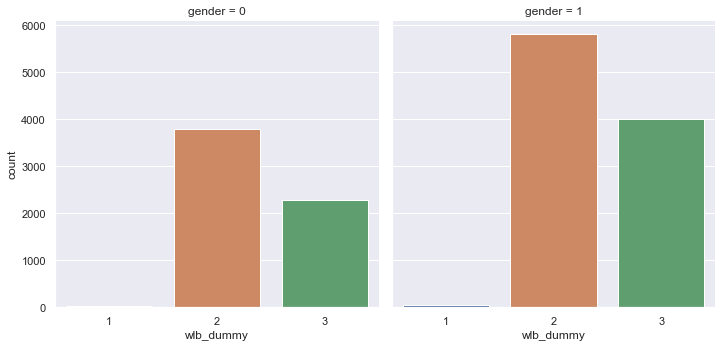

In [56]:
#Plot work life balance by gender
ax = sns.catplot(x="wlb_dummy", kind="count", col = "gender", data=data)

In [57]:
# Work life balance score by gender
# Calculate for each gender the percentage of respondents for the different numbers of work life balance score
data_wlb2=pd.concat([data['wlb_dummy'],pd.get_dummies(data['gender'])],axis=1).groupby('wlb_dummy').sum()
data_wlb2.index.name='wlb_dummy'
data_wlb2=percentage_f(data_wlb2)

data_wlb2

0          1
wlb_dummy                      
1           0.490677   0.446338
2          62.070658  58.896328
3          37.438665  40.657334

In [58]:
# Work life balance score by age
# Calculate for each one of the age ranges the percentage of respondents for the different numbers of work life balance score
data_wlb1=pd.concat([data['wlb_dummy'],pd.get_dummies(data['age'])],axis=1).groupby('wlb_dummy').sum()
data_wlb1.index.name='wlb_dummy'
data_wlb1=percentage_f(data_wlb1)
data_wlb1

1          2          3          4
wlb_dummy                                            
1           0.604728   0.425671   0.494092   0.412979
2          62.341946  66.126392  59.033298  49.557522
3          37.053326  33.447937  40.472610  50.029499

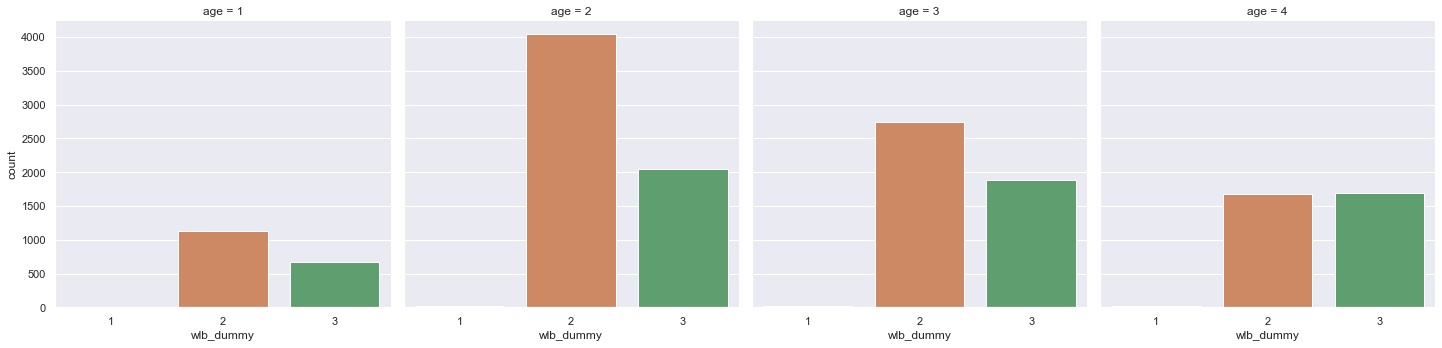

In [59]:
#Plot work life balance by  and age
ax = sns.catplot(x="wlb_dummy", kind="count", col = "age", data=data)

In [60]:
#Plot work life balance by age
#ax = sns.catplot(x="wlb_dummy", kind="count", col = "gender", data=data)

In [61]:
# Work life balance score by gender and age
data['wlb_dummy']=pd.to_numeric(data['wlb_dummy'],errors = 'coerce')
data_wlb3=data.pivot_table(values='wlb_dummy',  index=['age'], columns=['gender'],)
data_wlb3.head()

gender         0         1
age                       
1       2.366048  2.363380
2       2.313206  2.342559
3       2.370130  2.416751
4       2.502275  2.493234

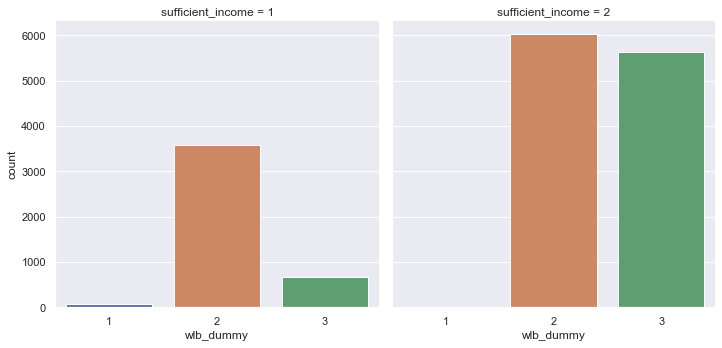

In [62]:
#Plot work life balance by sufficient income
ax = sns.catplot(x="wlb_dummy", kind="count", col = "sufficient_income", data=data)

In [63]:
# Work life balance score by sufficient income
data_wlb4=pd.concat([data['wlb_dummy'],pd.get_dummies(data['sufficient_income'])],axis=1).groupby('wlb_dummy').sum()
data_wlb4.index.name='wlb_dummy'
data_wlb4=percentage_f(data_wlb4)
data_wlb4

1          2
wlb_dummy                      
1           1.593902   0.042944
2          82.767383  51.687709
3          15.638716  48.269346

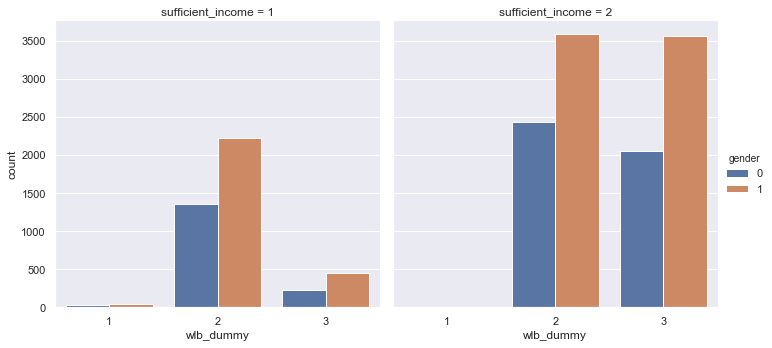

In [64]:
#Plot work life balance by gender and sufficient income
ax = sns.catplot(x="wlb_dummy", kind="count", hue="gender", col = "sufficient_income", data=data)

# Which demographic, amongst three different groups, have the better or worse achievement according to this data? 

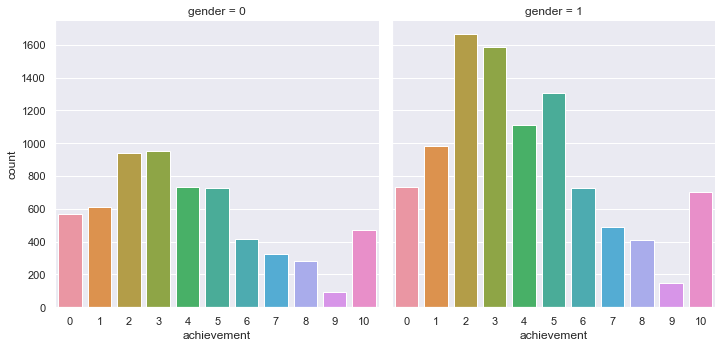

In [65]:
#Plot achivement by gender
ax = sns.catplot(x="achievement", kind="count", col = "gender", data=data)

In [66]:
# Achievement by gender
data_achieve1=pd.concat([data['achievement'],pd.get_dummies(data['gender'])],axis=1).groupby('achievement').sum()
data_achieve1.index.name='achievement'
data_achieve1=percentage_f(data_achieve1)

data_achieve1

0          1
achievement                      
0             9.257442   7.466017
1             9.993458   9.981741
2            15.423618  16.869548
3            15.554465  16.098600
4            11.939810  11.239602
5            11.858031  13.248123
6             6.820412   7.384865
7             5.299313   4.970582
8             4.645077   4.148915
9             1.521099   1.491175
10            7.687275   7.100832

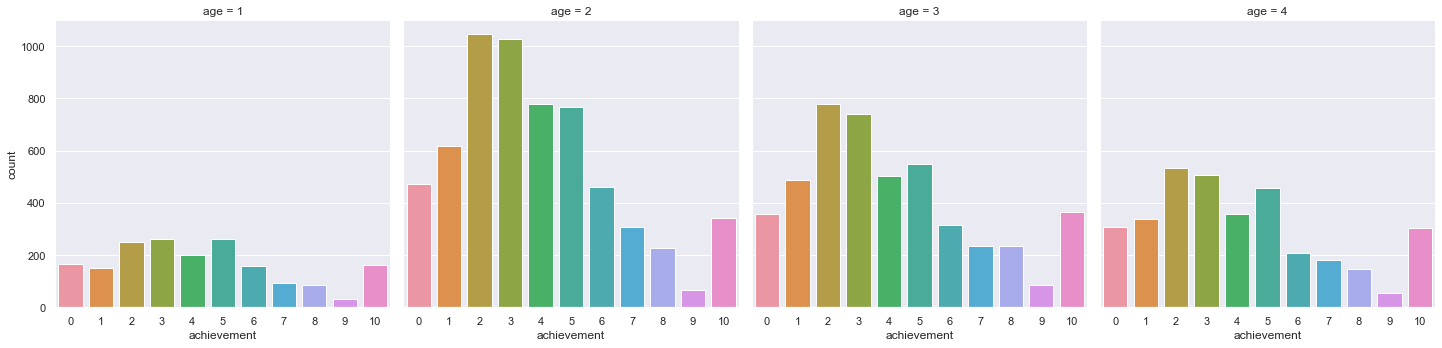

In [67]:
#Plot achivement by age
ax = sns.catplot(x="achievement", kind="count", col = "age", data=data)

In [68]:
# Achievement by age
# Calculate for each age group the percentage of respondents for the different numbers of achievement
data_achieve2=pd.concat([data['achievement'],pd.get_dummies(data['age'])],axis=1).groupby('achievement').sum()
data_achieve2.index.name='achievement'
data_achieve2=percentage_f(data_achieve2)

data_achieve2

1          2          3          4
achievement                                            
0             9.180869   7.711198   7.647691   9.085546
1             8.191314  10.134250  10.504834   9.970501
2            13.798791  17.108710  16.713212  15.693215
3            14.403518  16.797642  15.939850  14.985251
4            11.050027  12.737394  10.805585  10.501475
5            14.293568  12.524558  11.815252  13.451327
6             8.796042   7.563851   6.809882   6.076696
7             5.057724   5.026195   5.048335   5.309735
8             4.617922   3.732809   5.048335   4.306785
9             1.704233   1.096922   1.847476   1.651917
10            8.905992   5.566470   7.819549   8.967552

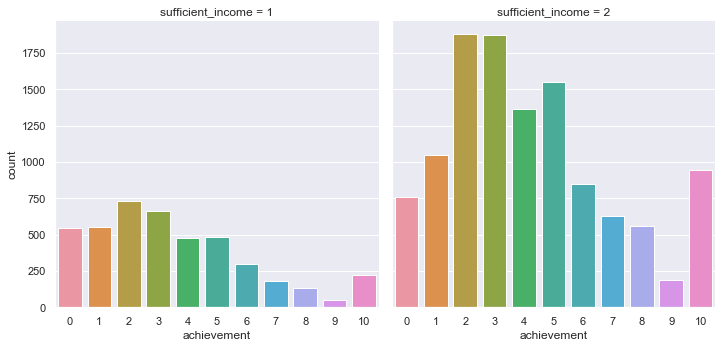

In [69]:
#Plot achivement by age
ax = sns.catplot(x="achievement", kind="count", col = "sufficient_income", data=data)

In [70]:
# Achievement by gender and age
data['achievement']=pd.to_numeric(data['achievement'],errors = 'coerce')
data_achieve4=data.pivot_table(values='achievement',  index=['age'], columns=['gender'],)
data_achieve4.head()

gender         0         1
age                       
1       4.086207  4.352113
2       3.781067  3.887602
3       4.156434  3.996285
4       4.227480  4.012222

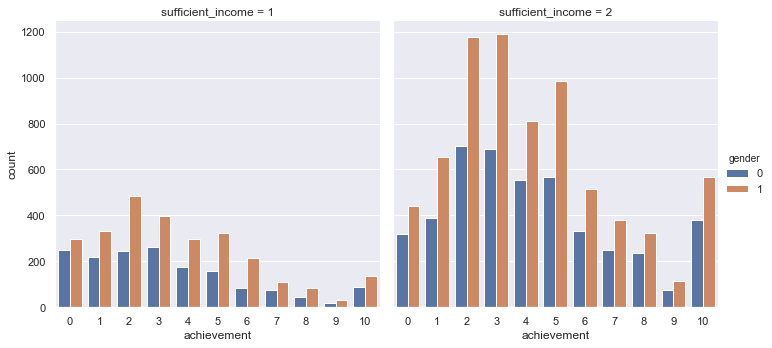

In [71]:
#Plot achievement by gender and sufficient income
ax = sns.catplot(x="achievement", kind="count", hue="gender", col = "sufficient_income", data=data)

In [72]:
# Achievement by sufficient_income
# Calculate for each age group the percentage of respondents for the different numbers of achievement
data_achieve3=pd.concat([data['achievement'],pd.get_dummies(data['sufficient_income'])],axis=1).groupby('achievement').sum()
data_achieve3.index.name='achievement'
data_achieve3=percentage_f(data_achieve3)

data_achieve3

1          2
achievement                      
0            12.612613   6.493172
1            12.728113   8.966761
2            16.839917  16.121275
3            15.315315  16.104097
4            10.972511  11.706605
5            11.134211  13.304131
6             6.837607   7.291935
7             4.227304   5.419565
8             3.026103   4.826935
9             1.155001   1.631882
10            5.151305   8.133643

# More EDA on other variables

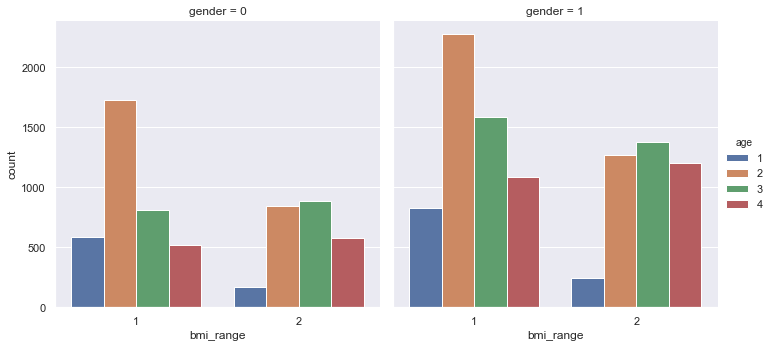

In [74]:
#Plot bmi_range by gender and age
ax = sns.catplot(x="bmi_range", kind="count", hue="age", col = "gender", data=data)

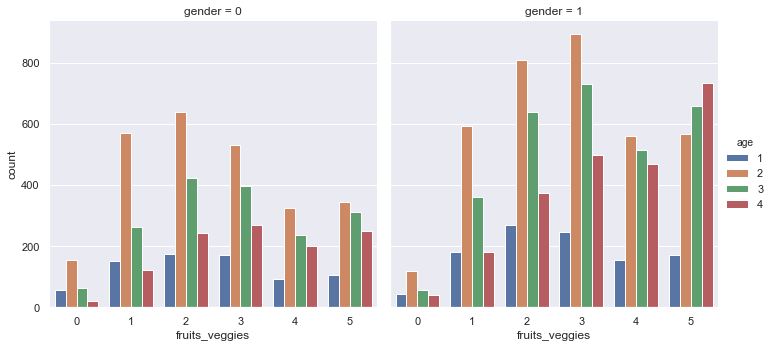

In [75]:
#Plot fruits_veggies by gender and age
ax = sns.catplot(x="fruits_veggies", kind="count", hue="age", col = "gender", data=data)

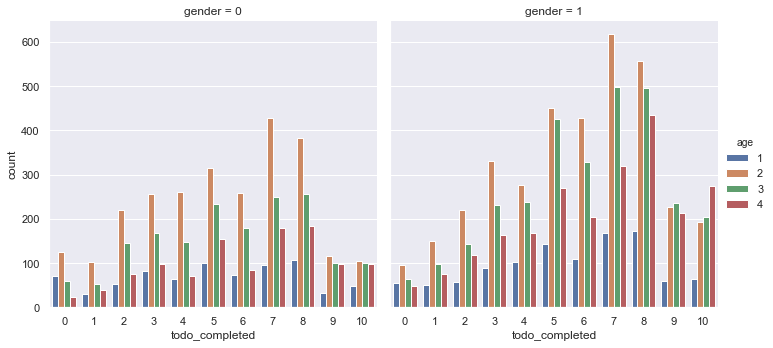

In [76]:
#Plot todo_completed by gender and age
ax = sns.catplot(x="todo_completed", kind="count", hue="age", col = "gender", data=data)

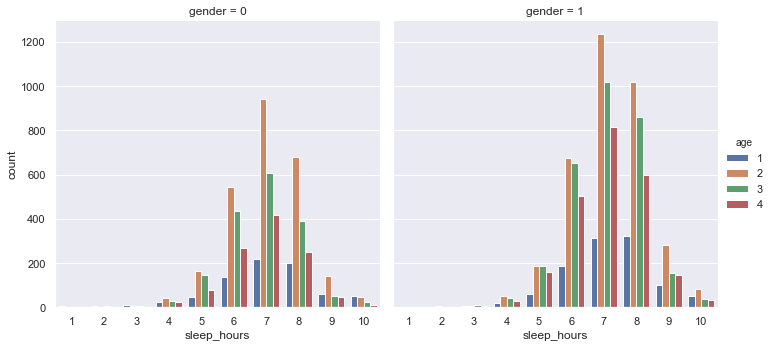

In [77]:
#Plot sleep_hours by gender and age
ax = sns.catplot(x="sleep_hours", kind="count", hue="age", col = "gender", data=data)

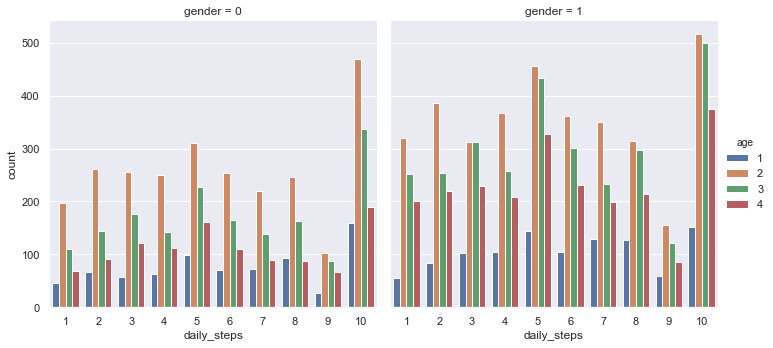

In [78]:
#Plot daily_steps by gender and age
ax = sns.catplot(x="daily_steps", kind="count", hue="age", col = "gender", data=data)

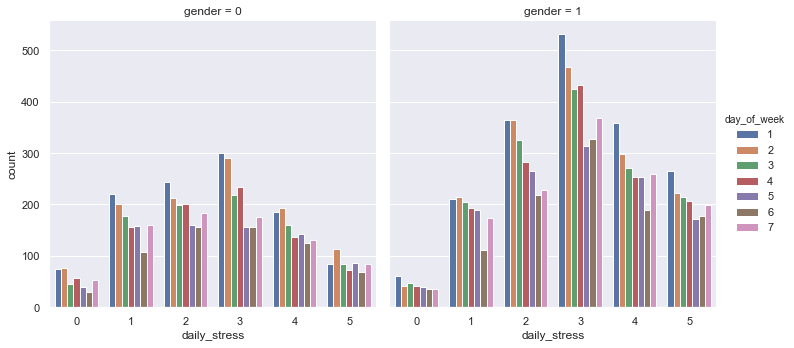

In [79]:

#Plot daily stress by gender and day of week
ax = sns.catplot(x="daily_stress", kind="count", hue="day_of_week", col = "gender", data=data)

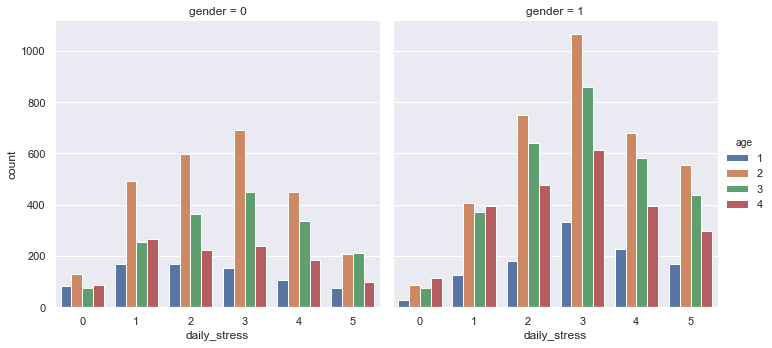

In [80]:
#Plot daily stress by gender and age
ax = sns.catplot(x="daily_stress", kind="count", hue="age", col = "gender", data=data)

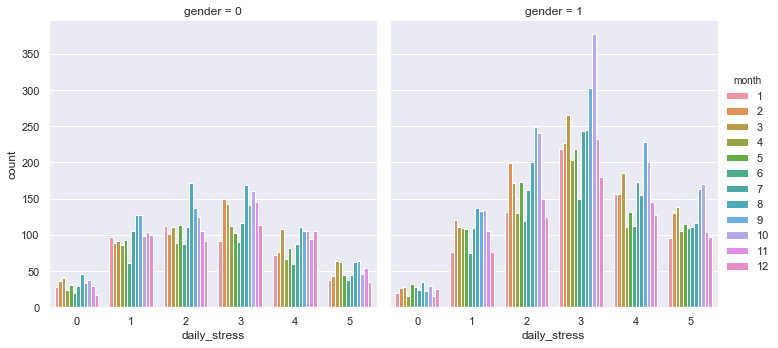

In [81]:
#Plot daily stress by gender and month
ax = sns.catplot(x="daily_stress", kind="count", hue="month", col = "gender", data=data)

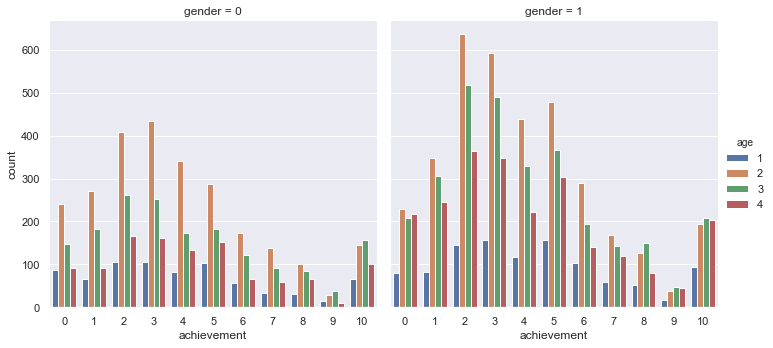

In [82]:
#Plot achivement by gender and age
ax = sns.catplot(x="achievement", kind="count", hue="age", col = "gender", data=data)

In [83]:
#Plot achivement by gender and age
#ax = sns.catplot(x="achievement", kind="count", col = "gender", data=data)

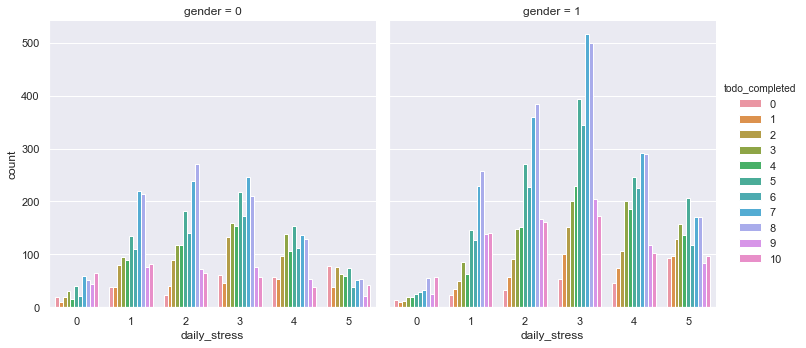

In [84]:
#Plot daily stress by gender and todo completed
ax = sns.catplot(x="daily_stress", kind="count", hue="todo_completed", col = "gender", data=data)

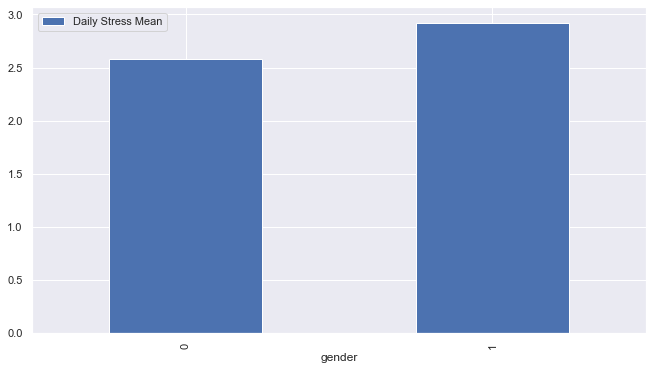

In [85]:
# Daily stress
x = data[['daily_stress', 'gender']].groupby(['gender'])['daily_stress'].agg(['mean']).reset_index().set_index('gender')
x = x.rename({'mean':'Daily Stress Mean'}, axis=1)
x.plot.bar()

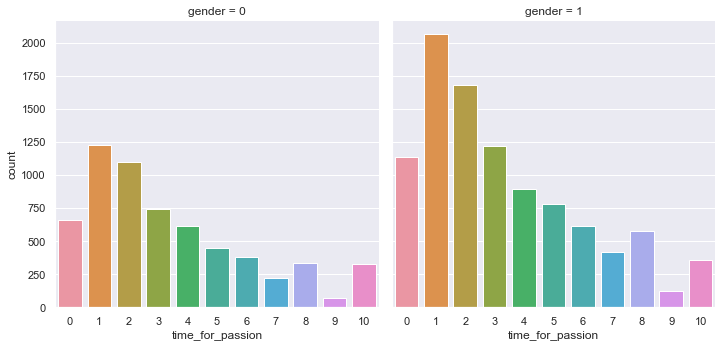

In [86]:
#Plot time for passion by gender
ax = sns.catplot(x="time_for_passion", kind="count", col = "gender", data=data)


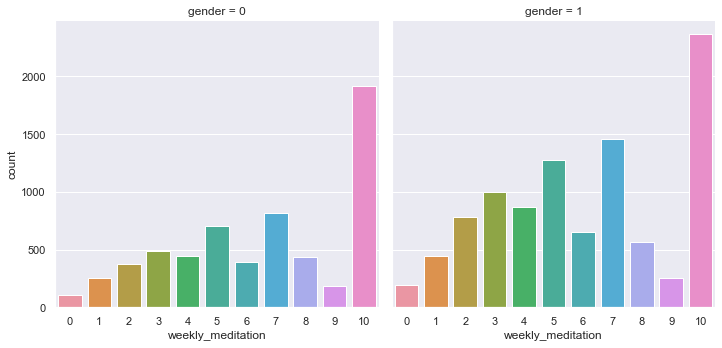

In [87]:
#Plot weekly meditation by gender
ax = sns.catplot(x="weekly_meditation", kind="count", col = "gender", data=data)


# What drives our work life balance?

In [88]:
#data.info()

In [89]:
#data.head()

(-1.1161863887121277,
 1.2039765632155877,
 -1.1230319105670357,
 1.1125722477100048)

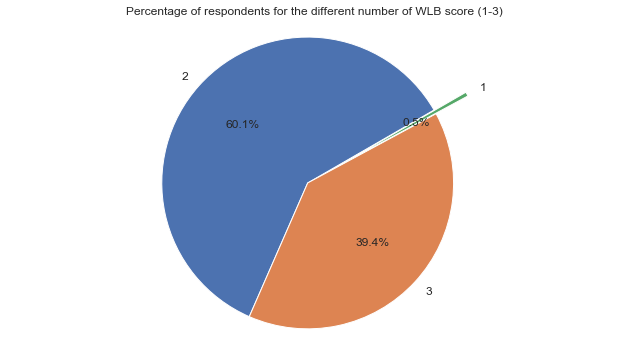

In [90]:
# A pie chart of the percentage of respondents for the different number of WLB score (1-3)
wlb_data=(data['wlb_dummy'].value_counts()*100)/(data.shape[0])

explode = (0, 0, 0.25) 
plt.pie(wlb_data, labels=wlb_data.index,explode=explode, autopct='%1.1f%%',shadow=False, startangle=30,textprops={'fontsize': 12})
plt.title('Percentage of respondents for the different number of WLB score (1-3)')
plt.axis('equal')

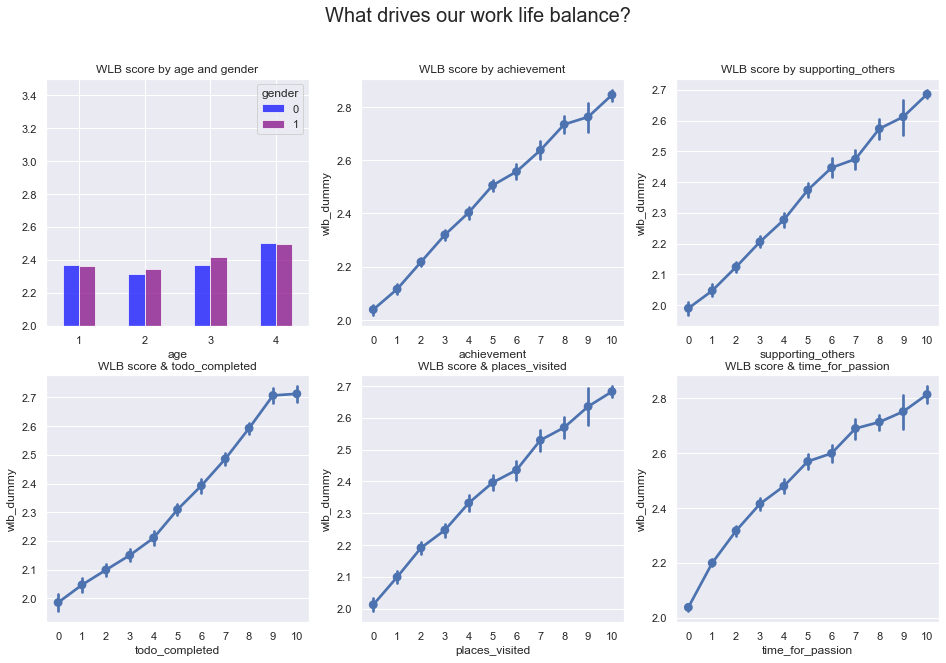

In [91]:
#plots for work life balance evaluation
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('WLB score by age and gender')
ax[0,1].set_title('WLB score by achievement')
ax[0,2].set_title('WLB score by supporting_others')
ax[1,0].set_title('WLB score & todo_completed')
ax[1,1].set_title('WLB score & places_visited')
ax[1,2].set_title('WLB score & time_for_passion')

ax[0,0].set_ylim([2, 3.5])
data_wlb3.plot(kind='bar', color=('blue', 'purple'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'achievement', y = 'wlb_dummy',  data=data, ax = ax[0,1])
sns.pointplot(x = 'supporting_others', y = 'wlb_dummy', data=data, ax = ax[0,2])
sns.pointplot(x = 'todo_completed', y = 'wlb_dummy',  data=data, ax = ax[1,0])
sns.pointplot(x = 'places_visited', y = 'wlb_dummy', data=data, ax = ax[1,1])
sns.pointplot(x = 'time_for_passion', y = 'wlb_dummy',  data=data, ax = ax[1,2])

f.suptitle('What drives our work life balance?', fontsize=20)
plt.show()

In [92]:
#Functions for evaluation of WLB
# def plot_f(data,param,x_lab,y_lab):
#     '''this function builds plot for the data frame'''
#     sns.set(style="ticks")
#     fig=data.set_index(param).T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("PuBu", 10)),figsize=(10,10))
#     plt.grid()
#     fig.set_ylabel(y_lab, fontsize=15)
#     fig.set_xlabel(x_lab, fontsize=15)
#     fig.tick_params(rotation= 45,labelsize=15)
    

# def percentage_f(data_p):
#     '''this function converts all variables to their percentage per column'''
#     summ=data_p.sum(axis=0)
#     data_p=data_p*100/summ
#     return data_p


In [93]:
data_wlb=pd.get_dummies(data['wlb_dummy'])
#data_wlb.head()

In [94]:
data_num2=pd.DataFrame(data.drop(['gender','wlb_dummy', 'work_life_balance_score'],axis=1))

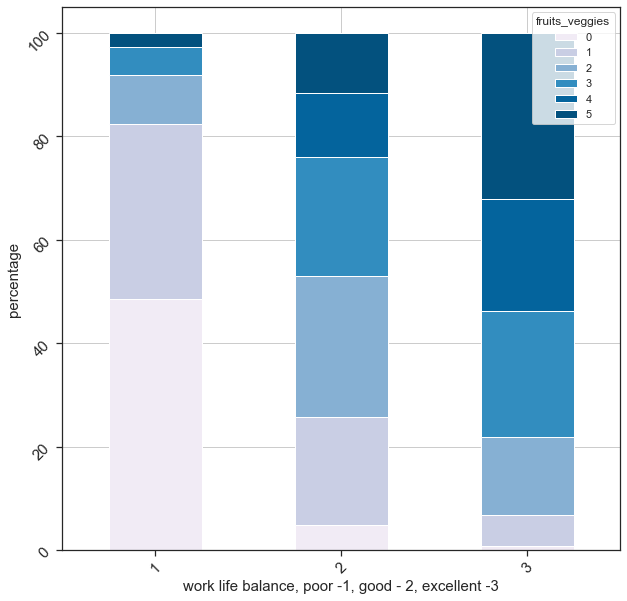

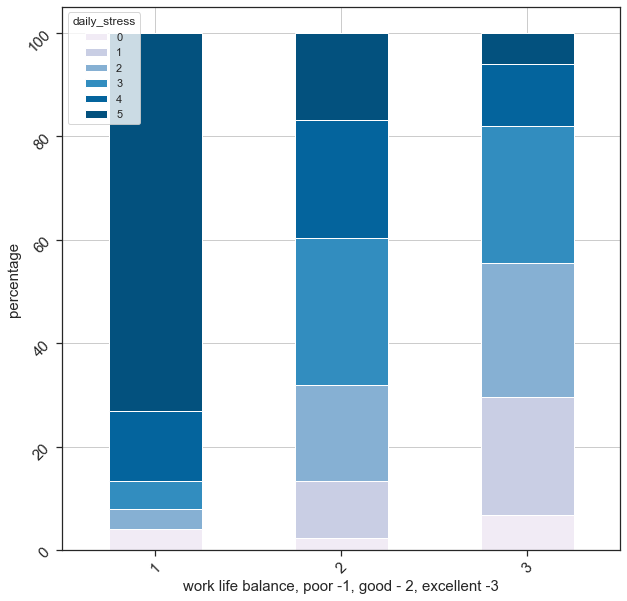

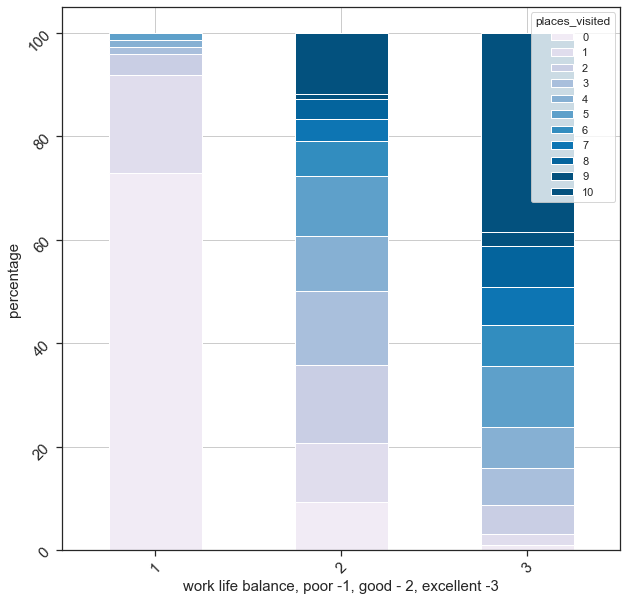

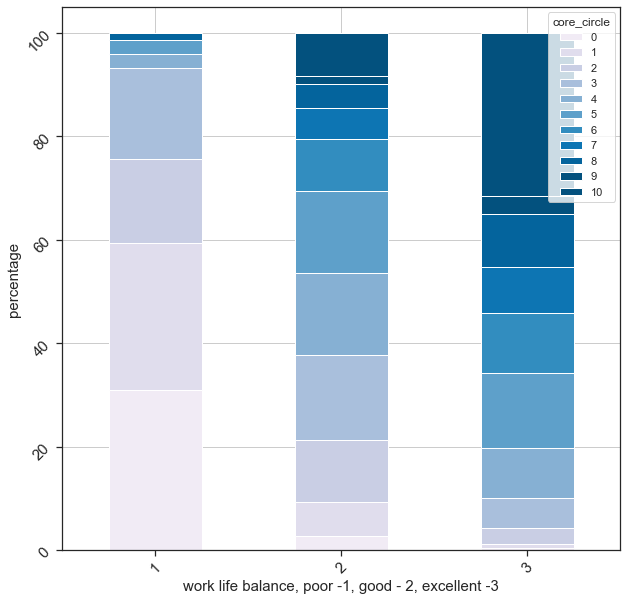

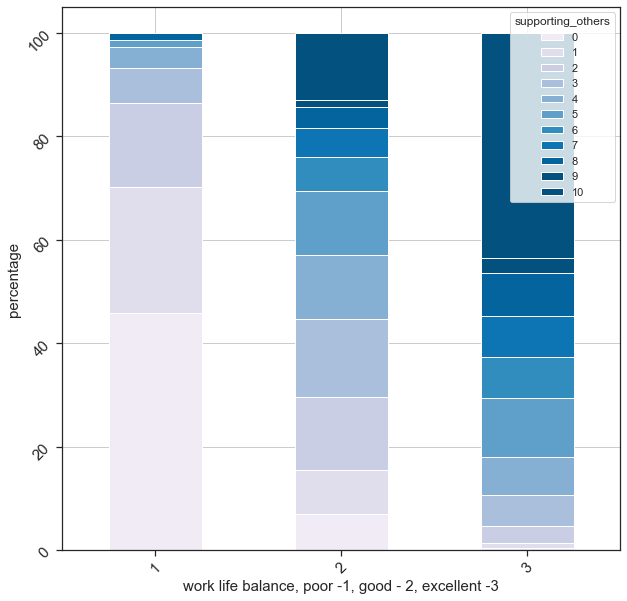

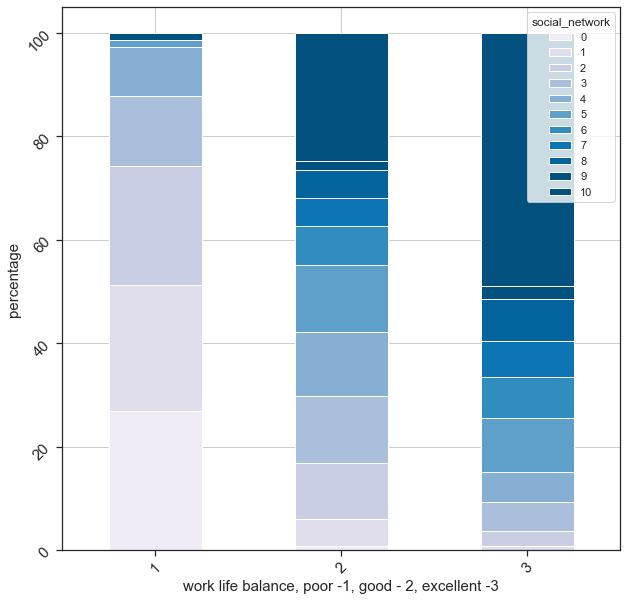

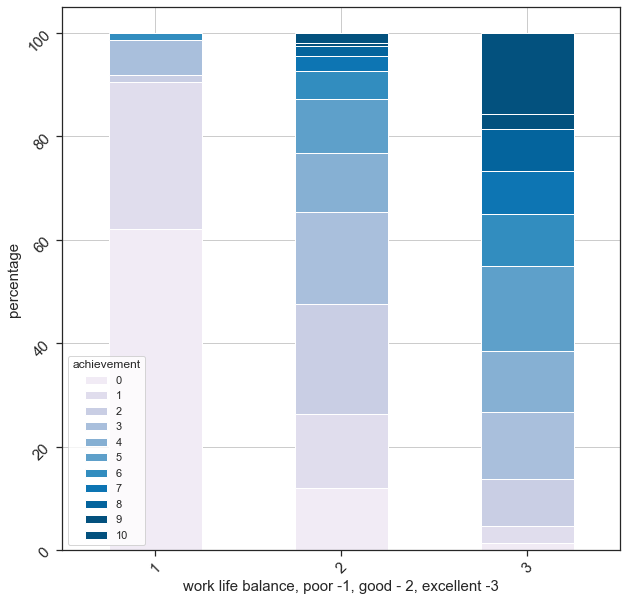

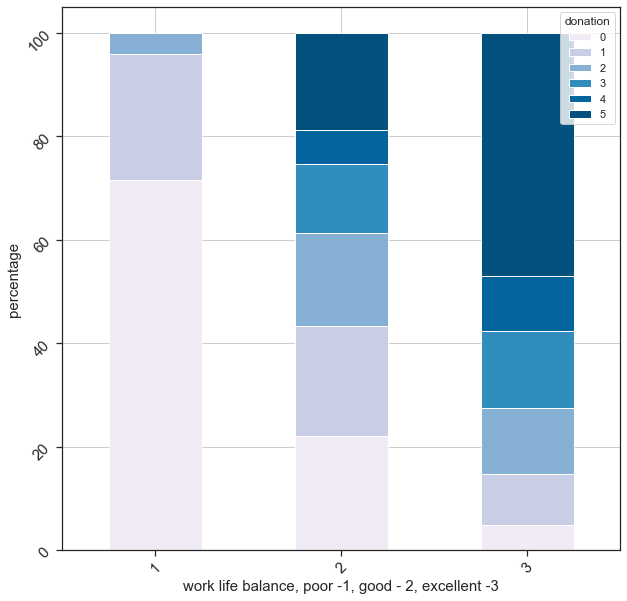

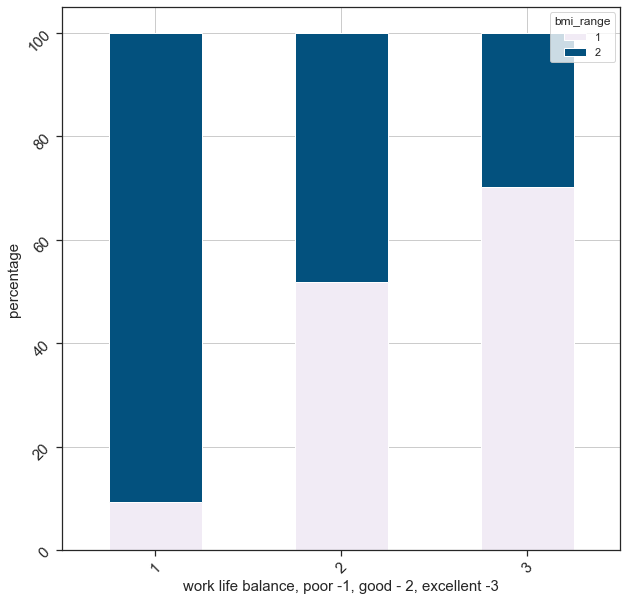

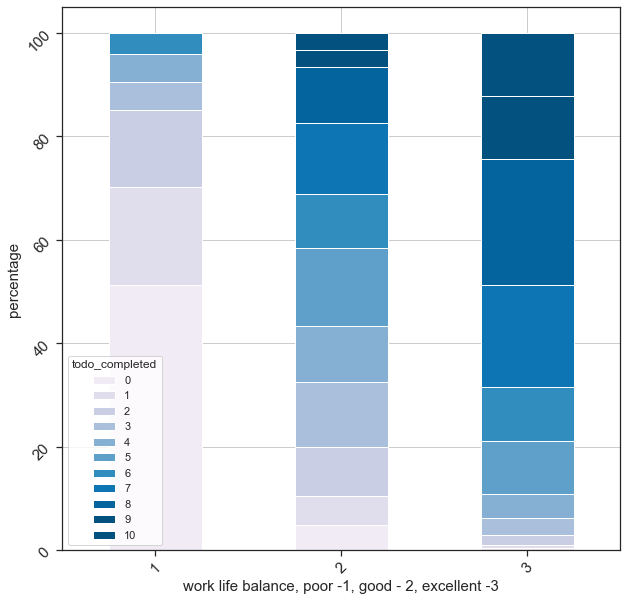

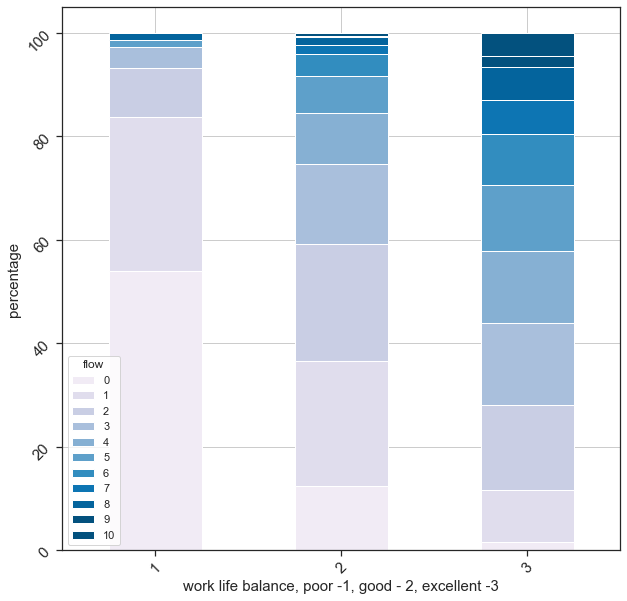

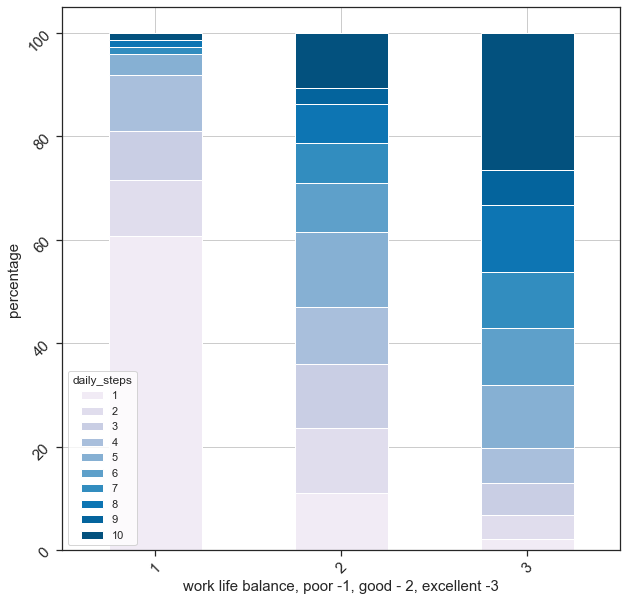

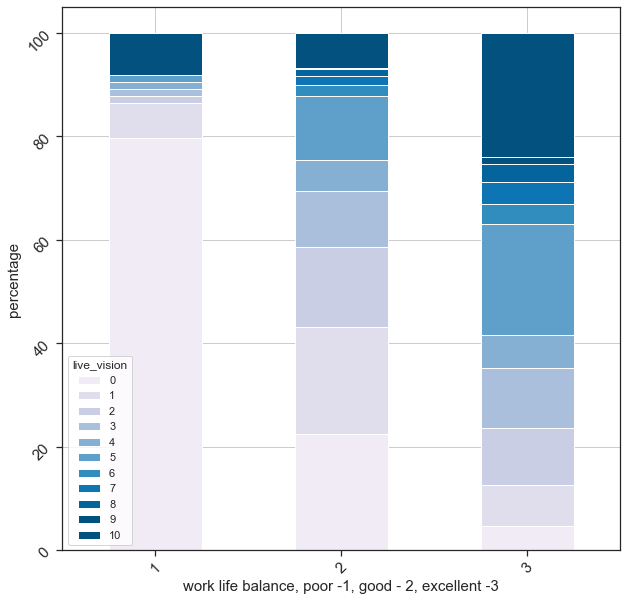

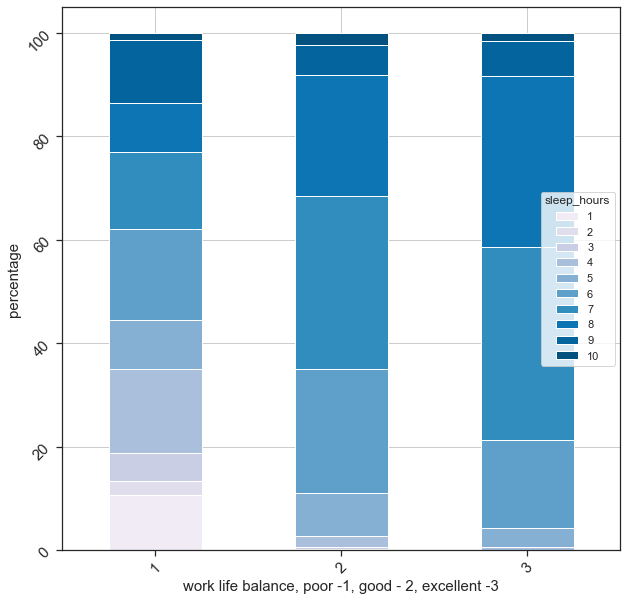

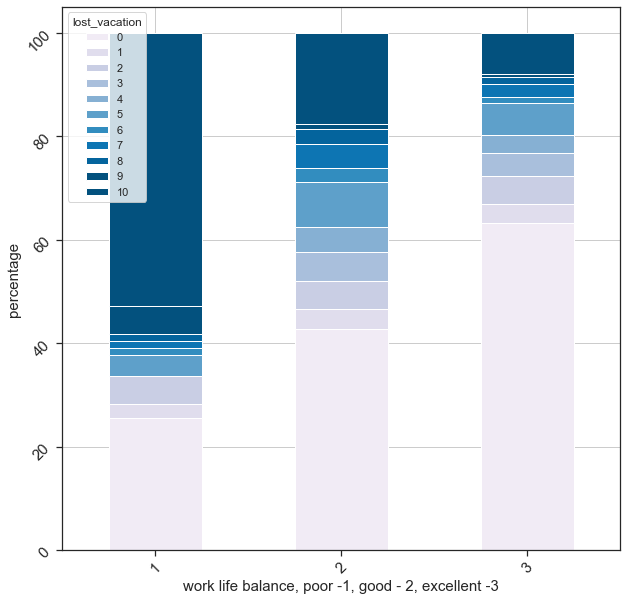

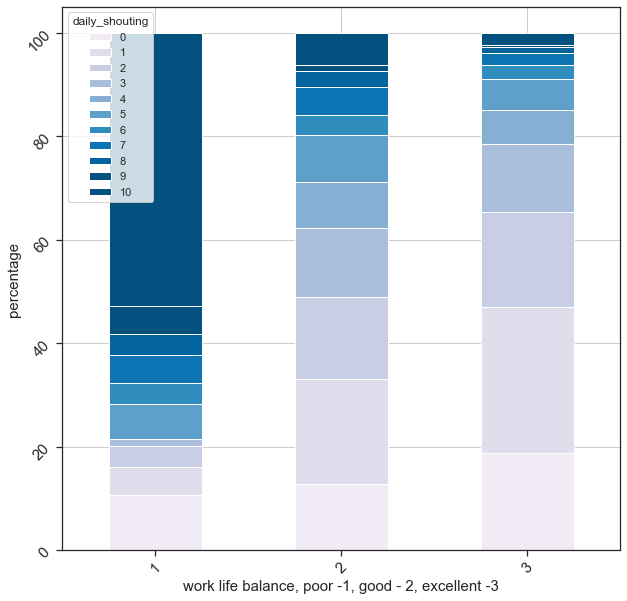

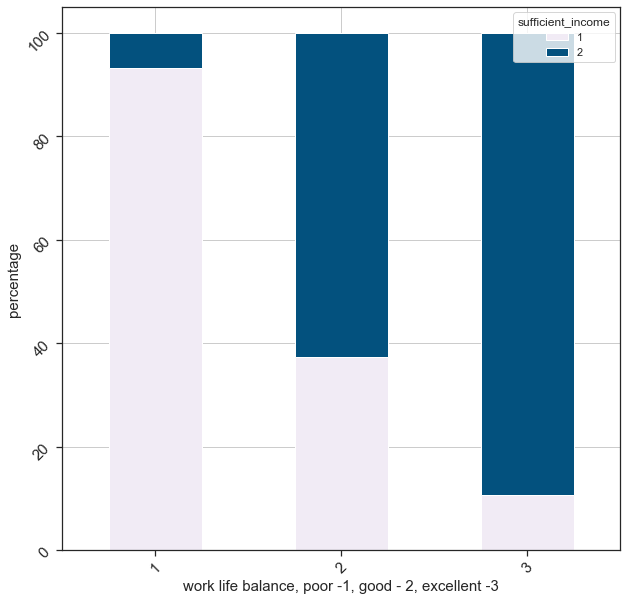

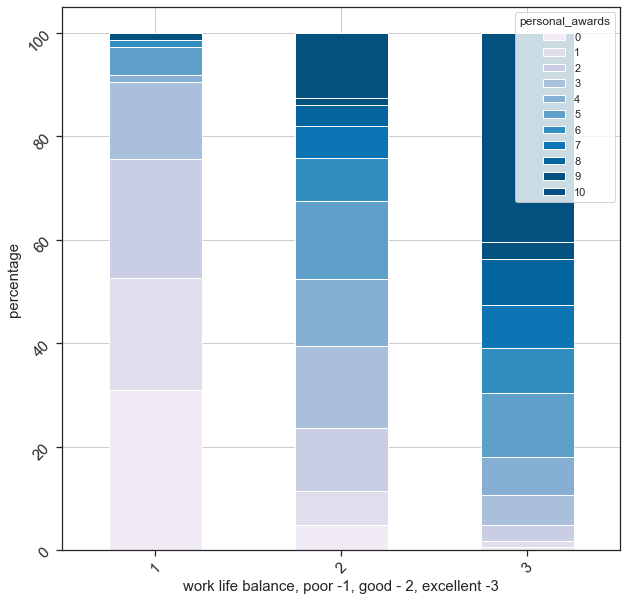

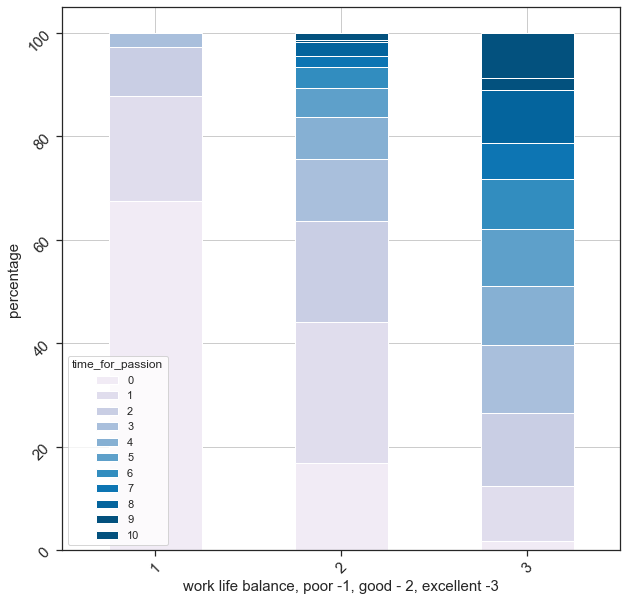

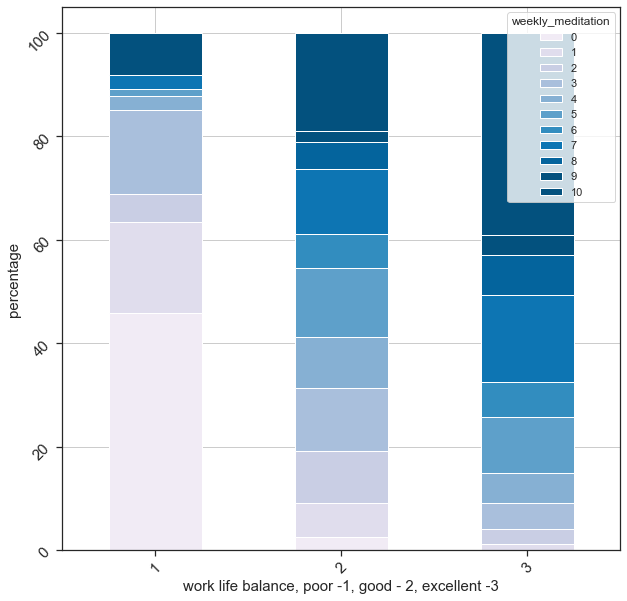

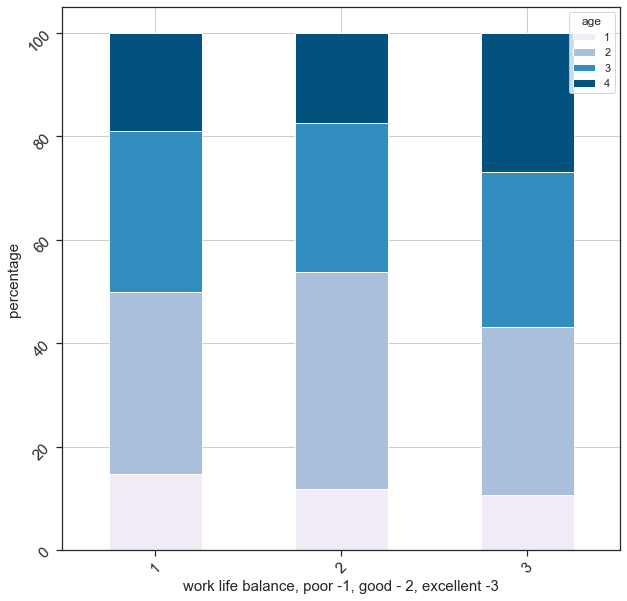

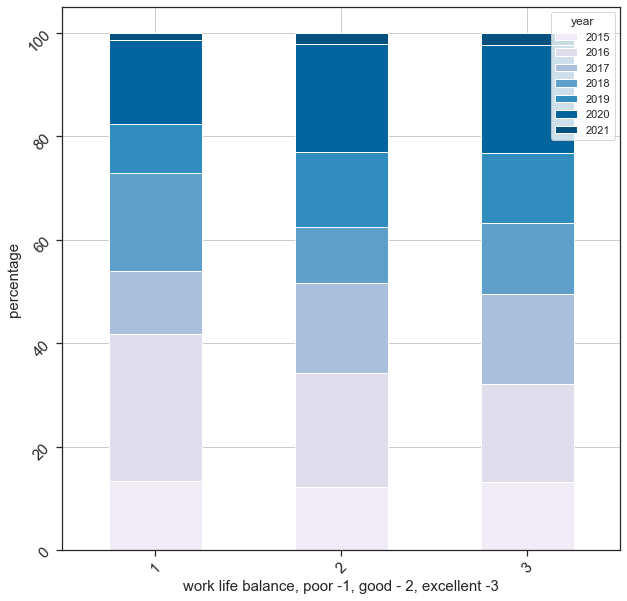

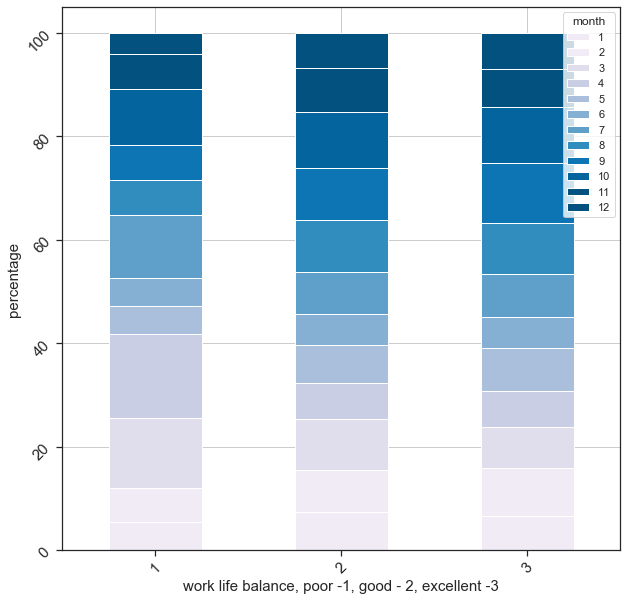

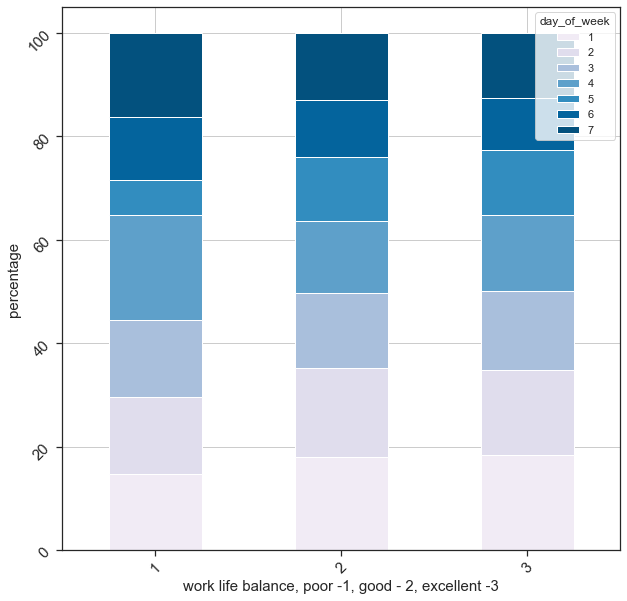

In [95]:
data_perc_per_wlb=[]

for i,col in enumerate(data_num2):
    col=str(col)
    data_wlb_i=pd.concat([data_num2[col],data_wlb],axis=1).groupby(col).sum()
    data_wlb_i.index.name=col
    data_wlb_i=percentage_f(data_wlb_i)
    
    data_perc_per_wlb.append(data_wlb_i)
    
for df in (data_perc_per_wlb):
    plot_f(df,df.index, 'work life balance, poor -1, good - 2, excellent -3','percentage')

# What drives our achievement?¶

(-1.1335528758938593,
 1.1251386653211224,
 -1.2227198740118774,
 1.305149894066151)

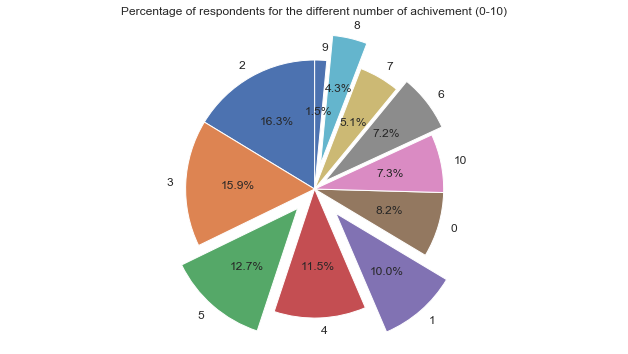

In [96]:
# A pie chart of the percentage of respondents for the different number of achivement (0-10)
achieve_data=(data['achievement'].value_counts()*100)/(data.shape[0])

explode = (0, 0, 0.2, 0, 0.25, 0, 0, 0.1, 0, 0.2, 0) 
plt.pie(achieve_data, labels=achieve_data.index,explode=explode, autopct='%1.1f%%',shadow=False, startangle=90,textprops={'fontsize': 12})
plt.title('Percentage of respondents for the different number of achivement (0-10)')
plt.axis('equal')

In [97]:
data.columns

Index(['fruits_veggies', 'daily_stress', 'places_visited', 'core_circle',
       'supporting_others', 'social_network', 'achievement', 'donation',
       'bmi_range', 'todo_completed', 'flow', 'daily_steps', 'live_vision',
       'sleep_hours', 'lost_vacation', 'daily_shouting', 'sufficient_income',
       'personal_awards', 'time_for_passion', 'weekly_meditation', 'age',
       'gender', 'work_life_balance_score', 'wlb_dummy', 'year', 'month',
       'day_of_week'],
      dtype='object')

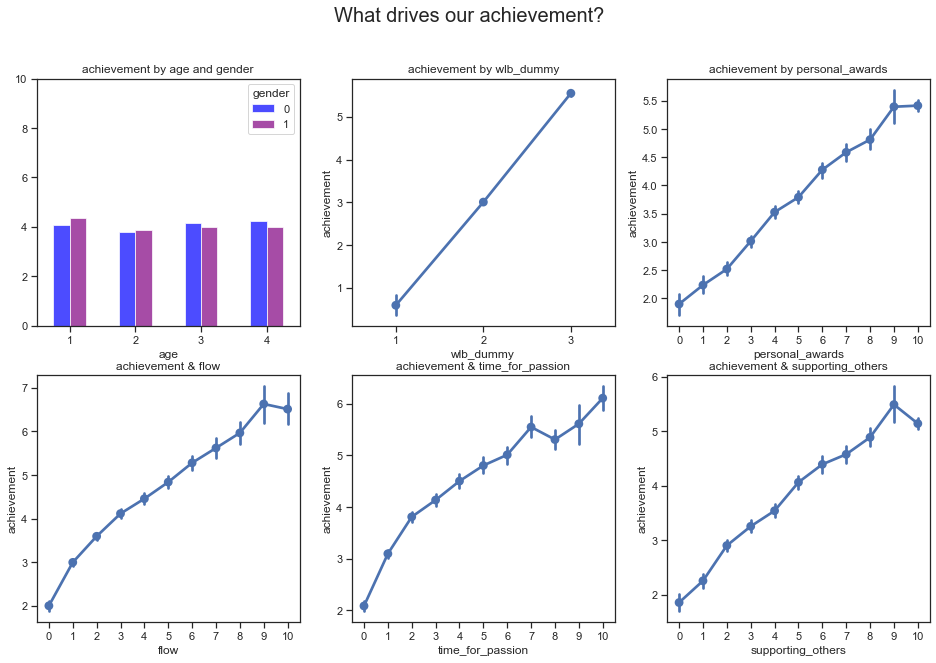

In [98]:
#plots for achievement evaluation
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('achievement by age and gender')
ax[0,1].set_title('achievement by wlb_dummy')
ax[0,2].set_title('achievement by personal_awards')
ax[1,0].set_title('achievement & flow')
ax[1,1].set_title('achievement & time_for_passion')
ax[1,2].set_title('achievement & supporting_others')

ax[0,0].set_ylim([0, 10])
data_achieve4.plot(kind='bar', color=('blue', 'purple'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'wlb_dummy', y = 'achievement',  data=data, ax = ax[0,1])
sns.pointplot(x = 'personal_awards', y = 'achievement', data=data, ax = ax[0,2])
sns.pointplot(x = 'flow', y = 'achievement',  data=data, ax = ax[1,0])
sns.pointplot(x = 'time_for_passion', y = 'achievement', data=data, ax = ax[1,1])
sns.pointplot(x = 'supporting_others', y = 'achievement',  data=data, ax = ax[1,2])

f.suptitle('What drives our achievement?', fontsize=20)
plt.show()

In [99]:

#Functions to build plots for evaluation of achivement
# def plot_f(data,param,x_lab,y_lab):
#     '''this function builds plot for the data frame'''
#     sns.set(style="ticks")
#     fig=data.set_index(param).T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("PuBu", 10)),figsize=(10,10))
#     plt.grid()
#     fig.set_ylabel(y_lab, fontsize=15)
#     fig.set_xlabel(x_lab, fontsize=15)
#     fig.tick_params(rotation= 45,labelsize=15)
    

# def percentage_f(data_p):
#     '''this function converts all variables to their percentage per column'''
#     summ=data_p.sum(axis=0)
#     data_p=data_p*100/summ
#     return data_p



In [100]:
data_achieve=pd.get_dummies(data['achievement'])
#data_age -> data_achieve

In [101]:
data_num1=pd.DataFrame(data.drop(['gender','achievement'],axis=1))

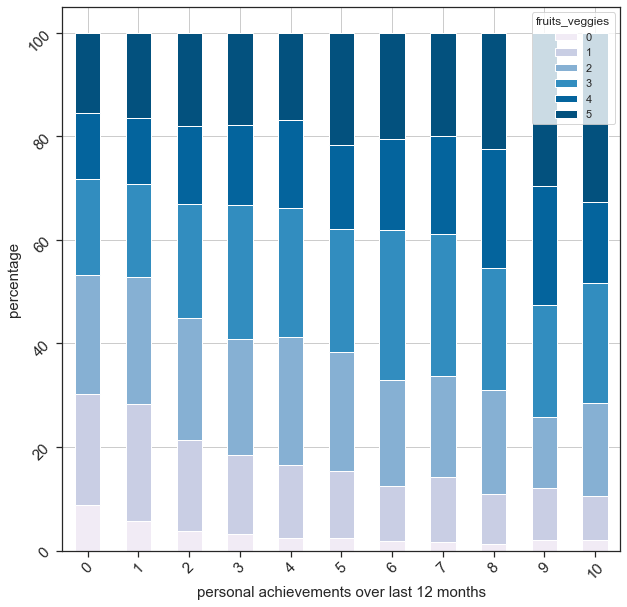

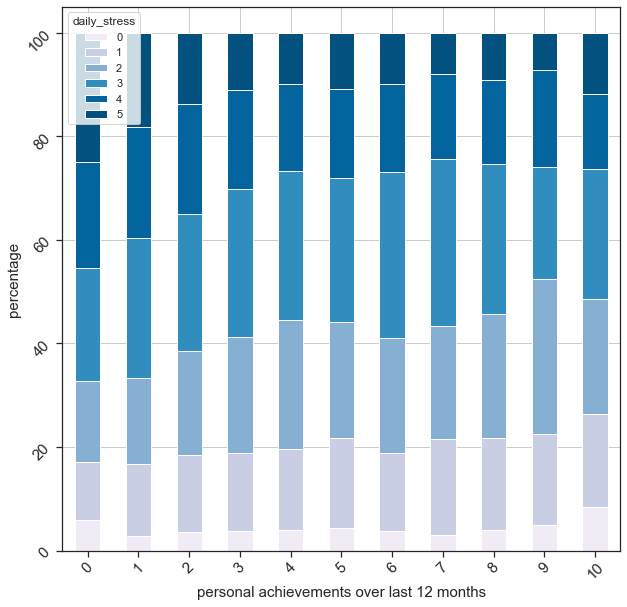

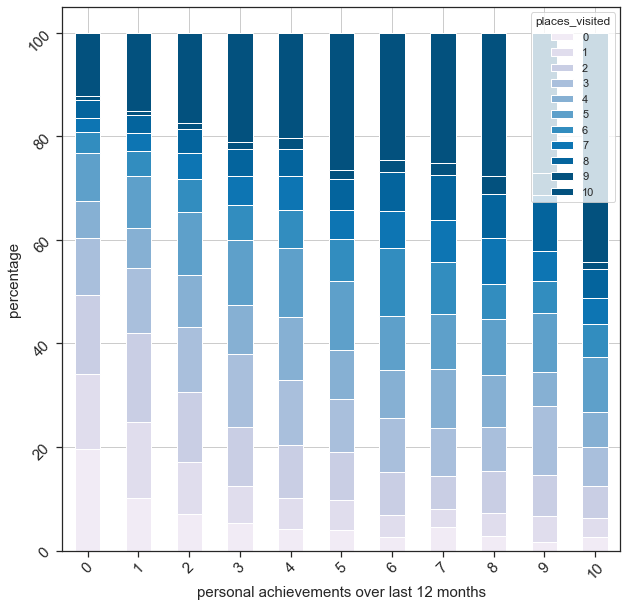

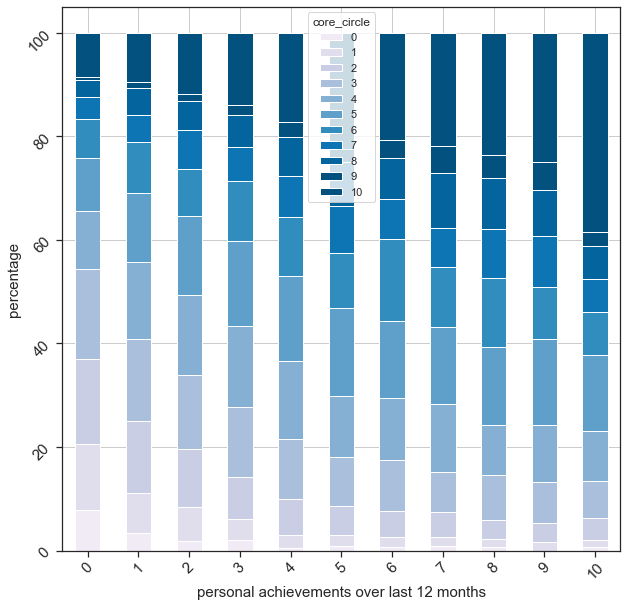

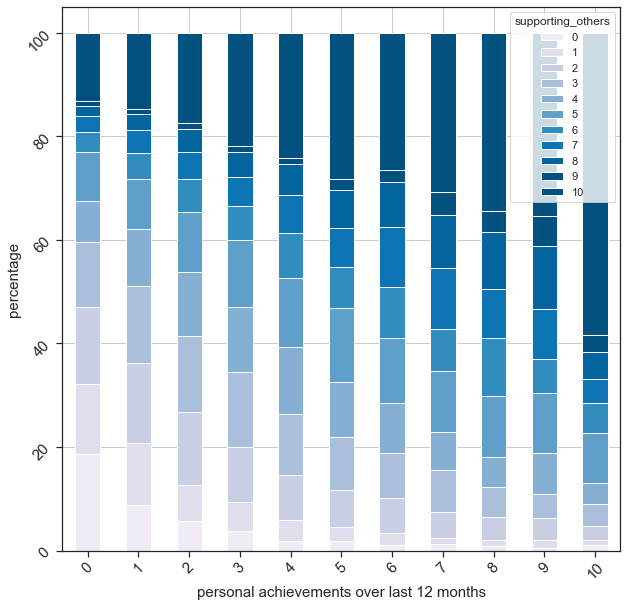

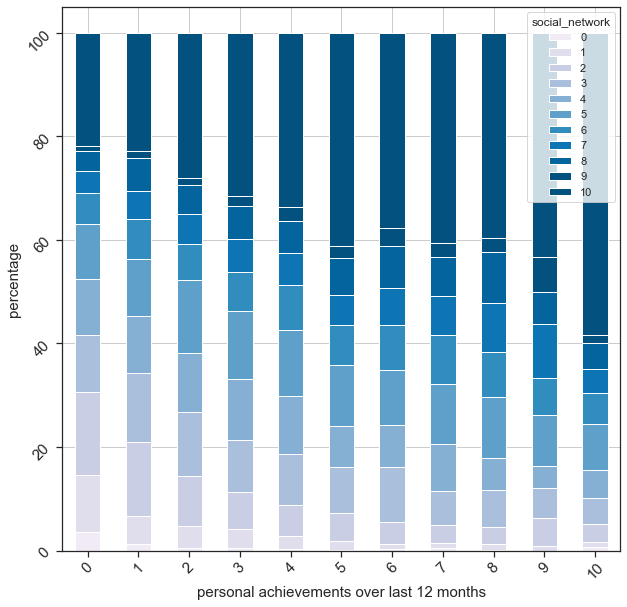

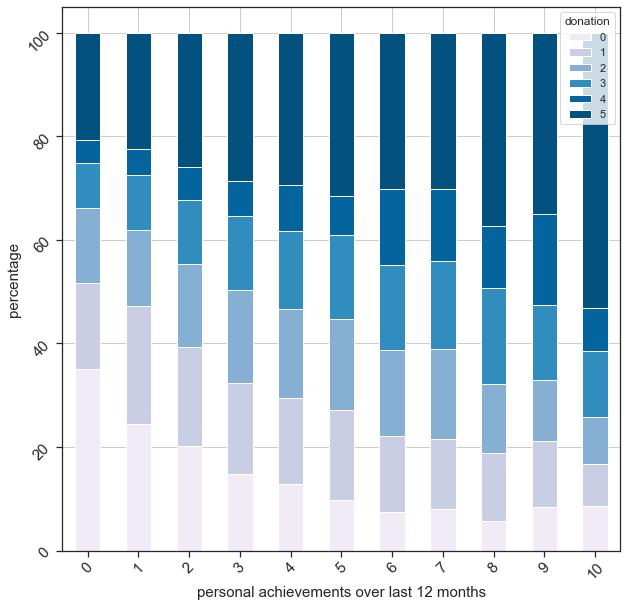

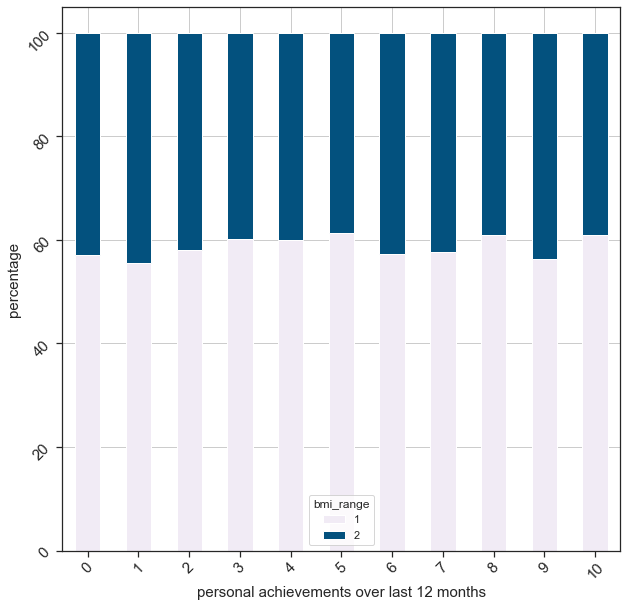

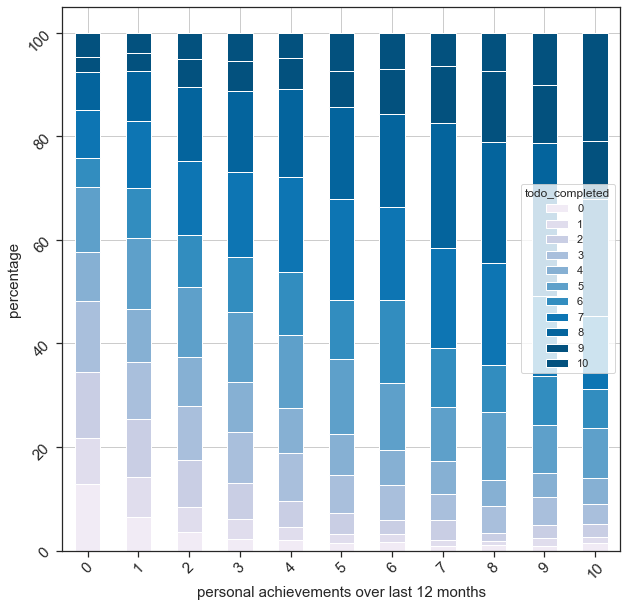

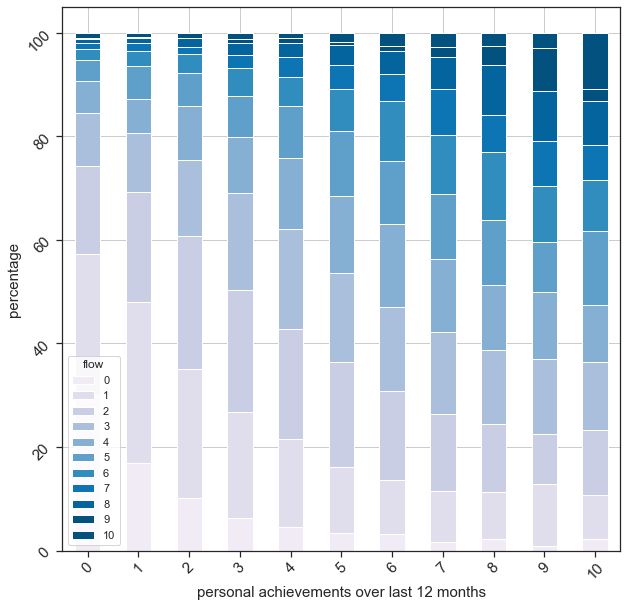

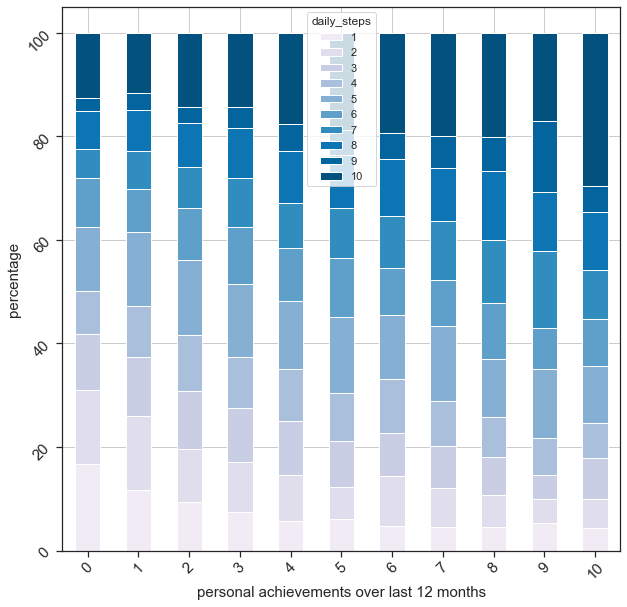

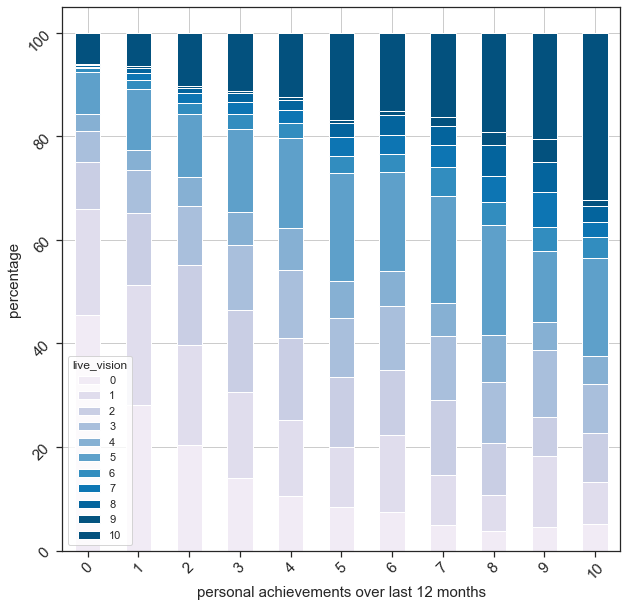

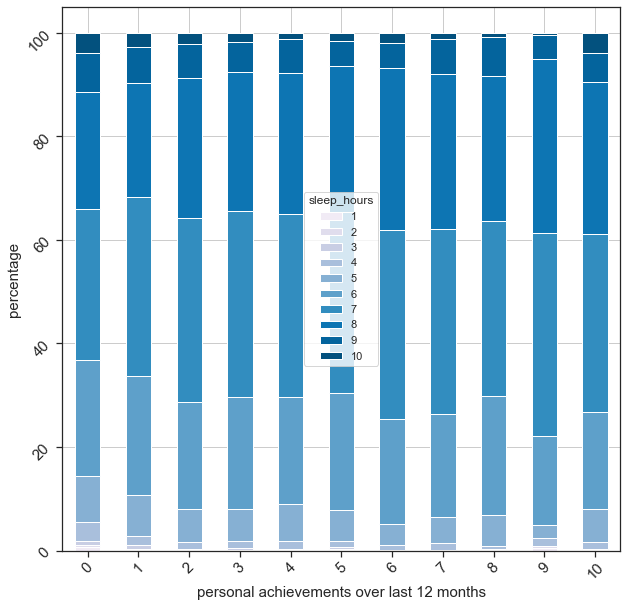

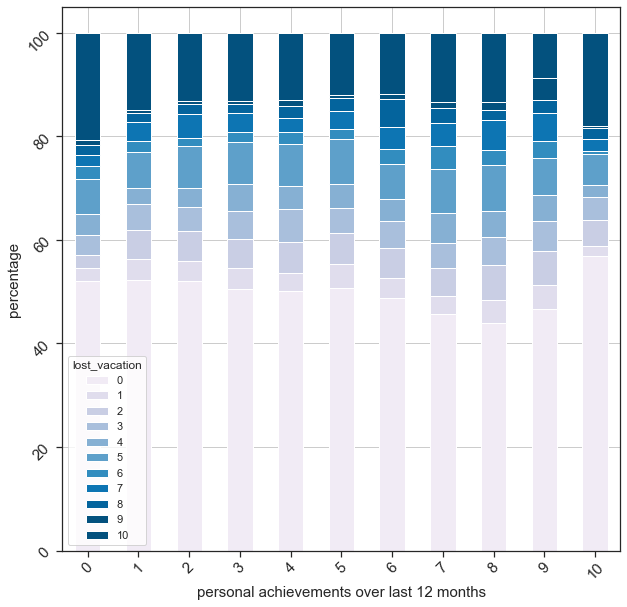

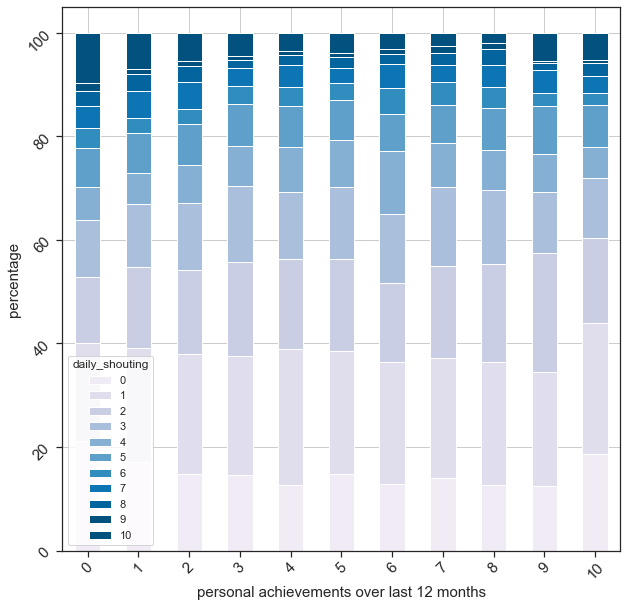

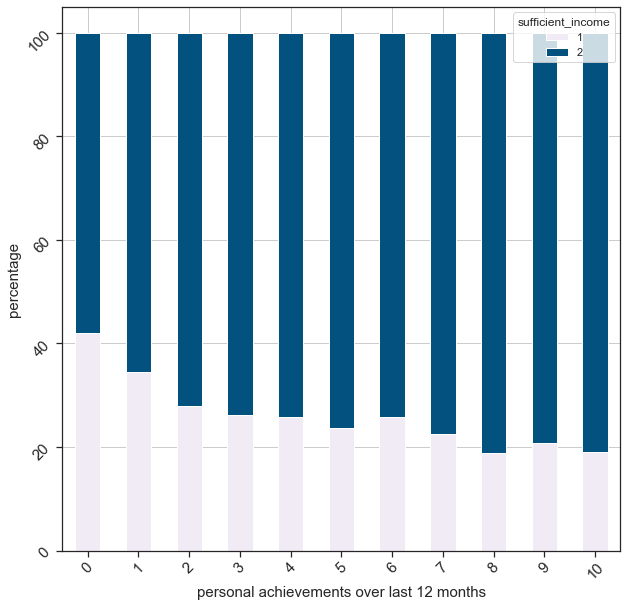

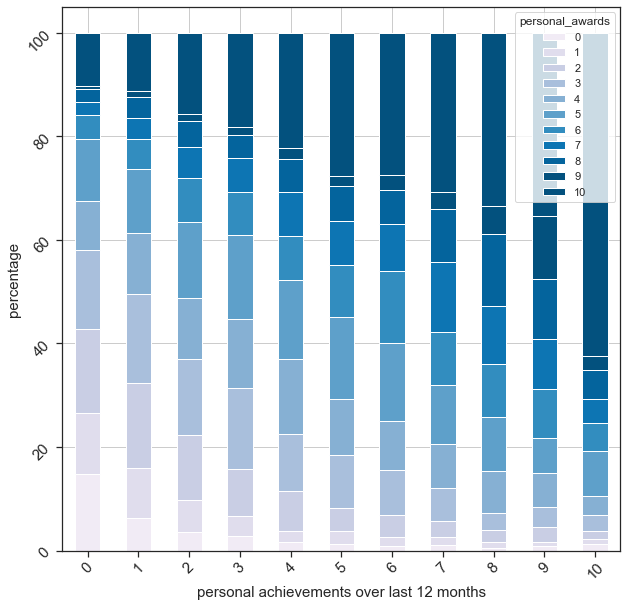

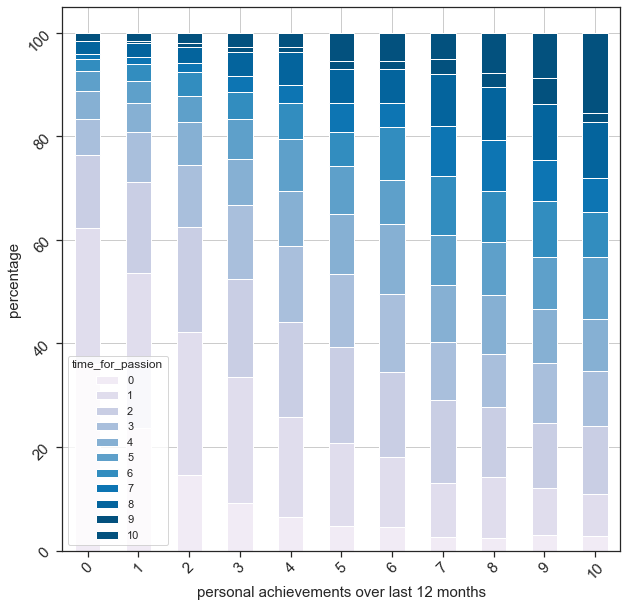

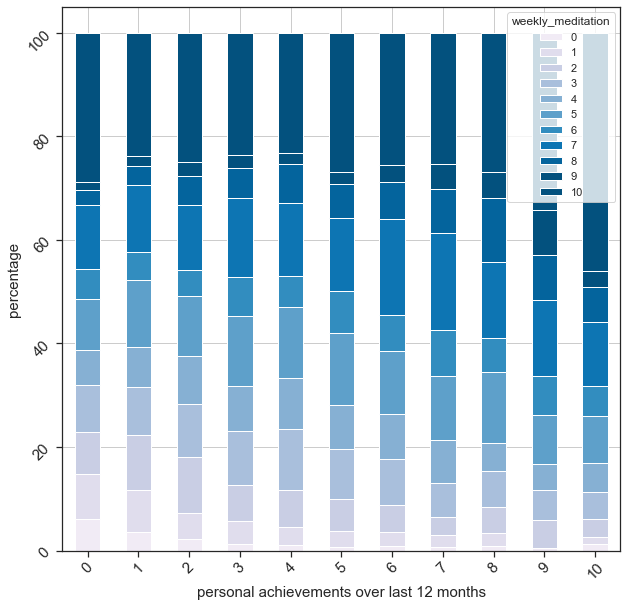

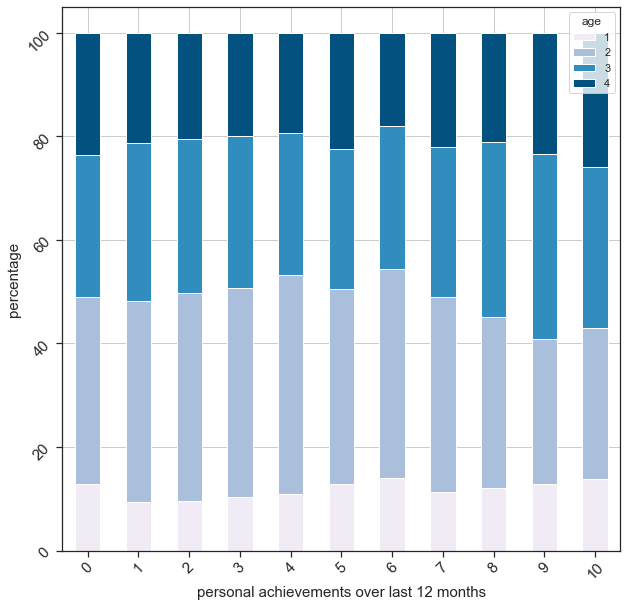

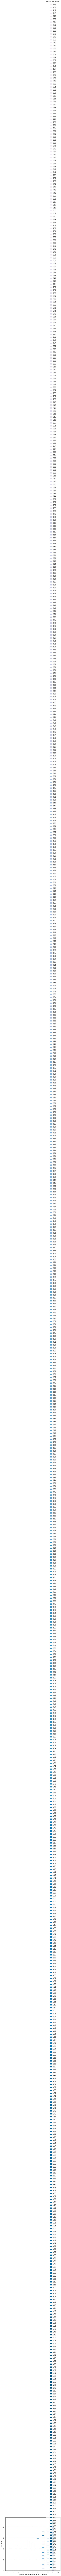

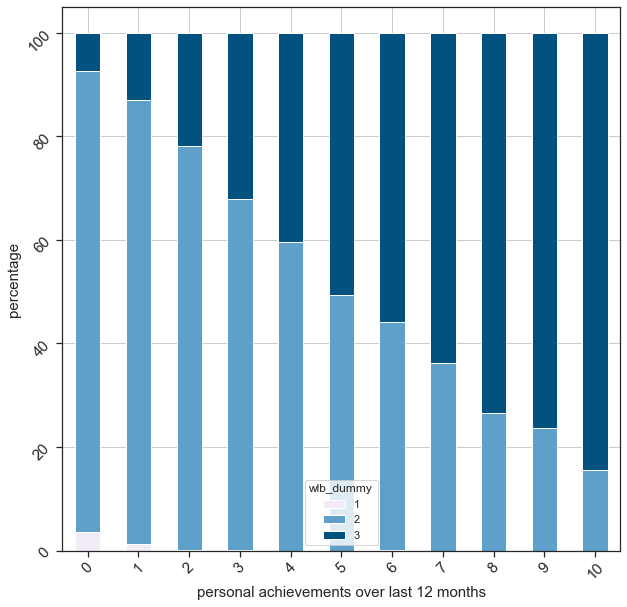

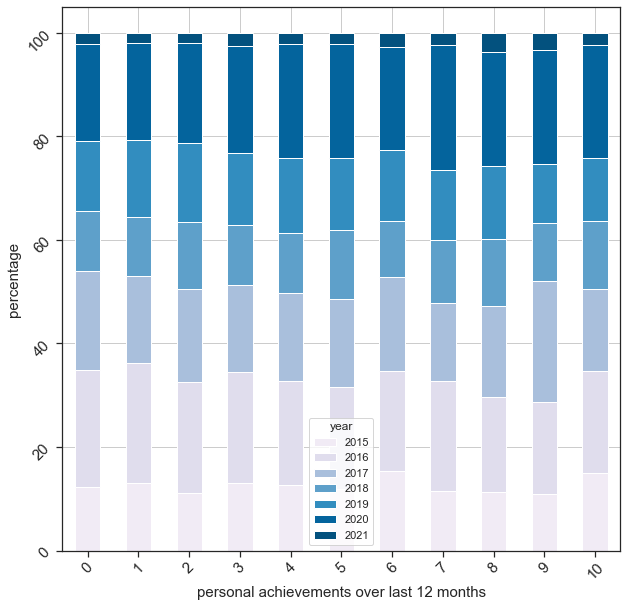

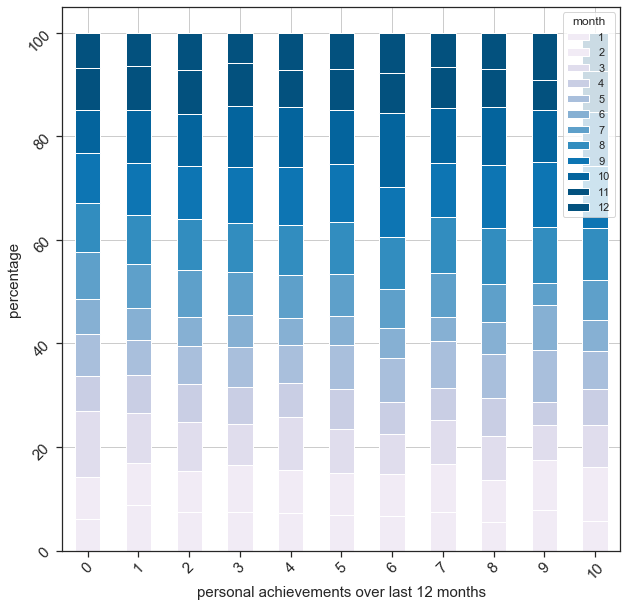

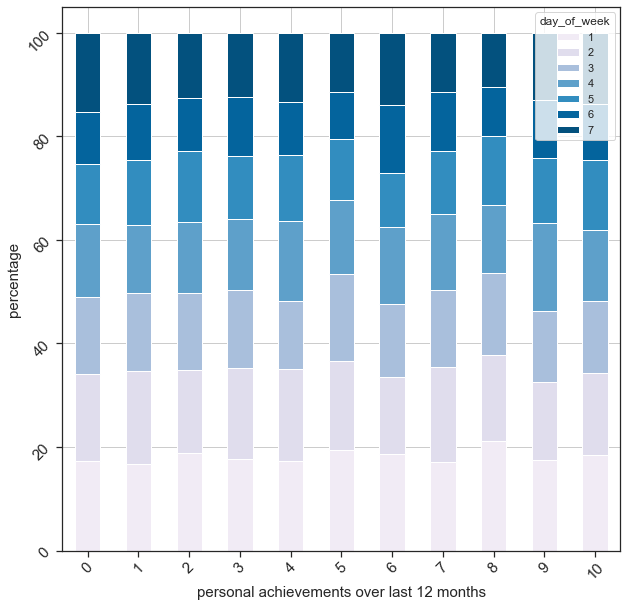

In [102]:
data_perc_per_achieve=[]

for i,col in enumerate(data_num1):
    col=str(col)
    data_achieve_i=pd.concat([data_num1[col],data_achieve],axis=1).groupby(col).sum()
    data_achieve_i.index.name=col
    data_achieve_i=percentage_f(data_achieve_i)
    
    data_perc_per_achieve.append(data_achieve_i)
    
for df in (data_perc_per_achieve):
    plot_f(df,df.index, 'personal achievements over last 12 months','percentage')